### Import Libraries

In [359]:
#IMPORT LIBRARIES


import pandas as pd  # library used for data science/data analysis and machine learning tasks
import numpy as np  # library used for working with arrays, math functions, linear algebra, fourier transform, matrices, and others.
import seaborn as sns  # library for making statistical graphics in Python.
import matplotlib.pyplot as plt  # library for plot visualizations
import re

# command for drawing  plots immediately after the current cell (show more than only one graph)
%matplotlib inline 

import os  # used here to access filedir functions
import datetime  # functions for manipulating date
import random  # functions for generating or manipulating random integers

#from scipy.stats import poisson  # Statistic poisson library

# Scikit-learn is a machine learning library. Contains functions for regression, classification and clustering algorithms.
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

# Remove Warnings 
import warnings
warnings.filterwarnings('ignore')

# print the entire dataframe
#pd.set_option('display.max_rows', 10)

.

# Data Undersanding

### House Construction Cost

In [2]:
#Datasets names to be used and the respective index captured from the source
#Ireland_Construction_Cost_Index_HSA09.20230502094108.csv - INDEX = Jan/1991
#Germany_Construction_Cost_Index_OPCNRE01DEQ661N.csv      - INDEX = 2015
#Italy_Construction_Cost_Index_OPCNRE01ITM661N.csv        - INDEX = 2015

#opening datasets with construction cost values
df_Ireland_Construction_Cost = pd.read_csv('Ireland_Construction_Cost_Index_HSA09.20230502094114.csv'); 
df_Germany_Construction_Cost = pd.read_csv("Germany_Construction_Cost_Index_OPCNRE01DEQ661N.csv");
df_Italy_Construction_Cost = pd.read_csv("Italy_Construction_Cost_Index_OPCNRE01ITM661N.csv");


.

### Ireland

In [3]:
# printing the first 5 rows of Ireland dataset

df_Ireland_Construction_Cost

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02196V02652,State,UNIT,VALUE
0,HSA09,House Construction Cost Index,1975,1975,-,State,Base Jan 1991=100,20.0
1,HSA09,House Construction Cost Index,1976,1976,-,State,Base Jan 1991=100,22.9
2,HSA09,House Construction Cost Index,1977,1977,-,State,Base Jan 1991=100,26.9
3,HSA09,House Construction Cost Index,1978,1978,-,State,Base Jan 1991=100,29.6
4,HSA09,House Construction Cost Index,1979,1979,-,State,Base Jan 1991=100,34.2
5,HSA09,House Construction Cost Index,1980,1980,-,State,Base Jan 1991=100,42.3
6,HSA09,House Construction Cost Index,1981,1981,-,State,Base Jan 1991=100,50.4
7,HSA09,House Construction Cost Index,1982,1982,-,State,Base Jan 1991=100,57.4
8,HSA09,House Construction Cost Index,1983,1983,-,State,Base Jan 1991=100,62.2
9,HSA09,House Construction Cost Index,1984,1984,-,State,Base Jan 1991=100,68.4


In [4]:
#Shape command to see the dataframe dimensions
df_Ireland_Construction_Cost.shape

(42, 8)

In [5]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Ireland_Construction_Cost.describe()

,TLIST(A1),Year,VALUE
count,42.000000,42.000000,42.000000
mean,1995.500000,1995.500000,124.826190
std,12.267844,12.267844,63.790117
min,1975.000000,1975.000000,20.000000
25%,1985.250000,1985.250000,77.500000
50%,1995.500000,1995.500000,115.500000
75%,2005.750000,2005.750000,192.375000
max,2016.000000,2016.000000,209.400000


In [6]:
#Info command to show data type of features, null values, and other important values. 
df_Ireland_Construction_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        42 non-null     object 
 1   STATISTIC Label  42 non-null     object 
 2   TLIST(A1)        42 non-null     int64  
 3   Year             42 non-null     int64  
 4   C02196V02652     42 non-null     object 
 5   State            42 non-null     object 
 6   UNIT             42 non-null     object 
 7   VALUE            42 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.8+ KB


In [7]:
#sns.boxplot(x=df_Ireland_Construction_Cost["VALUE"])

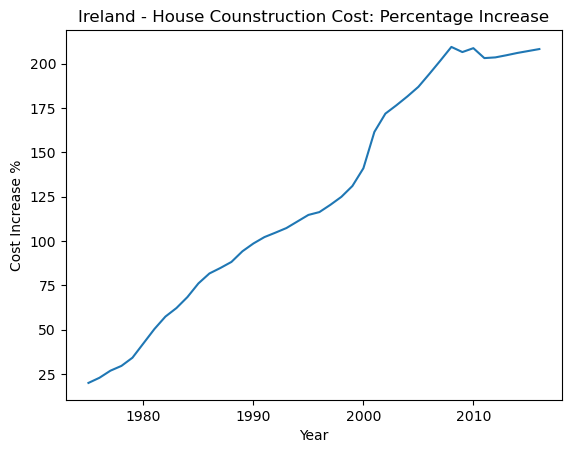

In [8]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Ireland_Construction_Cost['Year'], df_Ireland_Construction_Cost['VALUE'], label='Ireland');  # Plot first line of data.

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Cost Increase %');  # Add a y-label to the axes.
ax.set_title("Ireland - House Counstruction Cost: Percentage Increase");  # Add a title to the axes.


.

### Germany

In [9]:
# printing the first 5 rows of Germany dataset
df_Germany_Construction_Cost

,DATE,OPCNRE01DEQ661N
0,1960-01-01,13.6
1,1960-04-01,14.0
2,1960-07-01,14.2
3,1960-10-01,14.3
4,1961-01-01,14.6
...,...,...
247,2021-10-01,132.3
248,2022-01-01,138.1
249,2022-04-01,147.2
250,2022-07-01,151.0


In [10]:
#Shape command to see the dataframe dimensions
df_Germany_Construction_Cost.shape

(252, 2)

In [11]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Germany_Construction_Cost.describe()

,OPCNRE01DEQ661N
count,252.000000
mean,63.376587
std,32.019776
min,13.600000
25%,34.100000
50%,67.400000
75%,85.325000
max,154.700000


In [12]:
#Info command to show data type of features, null values, and other important values. 
df_Germany_Construction_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             252 non-null    object 
 1   OPCNRE01DEQ661N  252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [13]:
#sns.boxplot(x=df_Germany_Construction_Cost["OPCNRE01DEQ661N"])

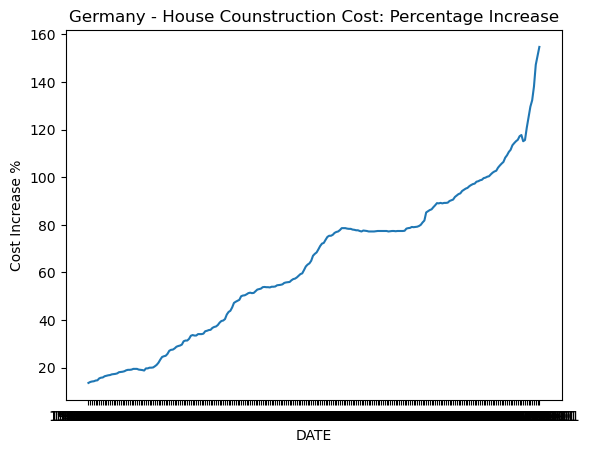

In [14]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Germany_Construction_Cost['DATE'], df_Germany_Construction_Cost['OPCNRE01DEQ661N'], label='Germany');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Cost Increase %');  # Add a y-label to the axes.
ax.set_title("Germany - House Counstruction Cost: Percentage Increase");  # Add a title to the axes.

.

### Italy

In [15]:
# printing the first 5 rows of Italy dataset
df_Italy_Construction_Cost

,DATE,OPCNRE01ITM661N
0,1967-01-01,3.132876
1,1967-02-01,3.142001
2,1967-03-01,3.142001
3,1967-04-01,3.145042
4,1967-05-01,3.148084
...,...,...
668,2022-09-01,122.630658
669,2022-10-01,123.230808
670,2022-11-01,123.330833
671,2022-12-01,123.330833


In [16]:
#Shape command to see the dataframe dimensions
df_Italy_Construction_Cost.shape

(673, 2)

In [17]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Italy_Construction_Cost.describe()

,OPCNRE01ITM661N
count,673.000000
mean,57.661799
std,35.813507
min,3.132876
25%,22.741927
50%,64.119271
75%,92.623156
max,123.330833


In [18]:
#Info command to show data type of features, null values, and other important values. 
df_Italy_Construction_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             673 non-null    object 
 1   OPCNRE01ITM661N  673 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [19]:
#sns.boxplot(x=df_Italy_Construction_Cost["OPCNRE01ITM661N"])

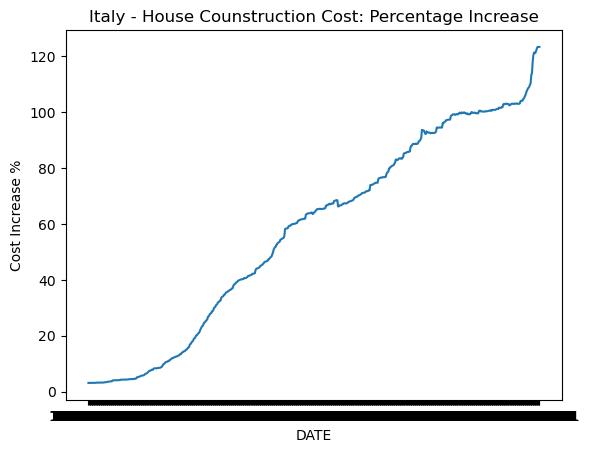

In [20]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Italy_Construction_Cost['DATE'], df_Italy_Construction_Cost['OPCNRE01ITM661N'], label='Italy');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Cost Increase %');  # Add a y-label to the axes.
ax.set_title("Italy - House Counstruction Cost: Percentage Increase");  # Add a title to the axes.

.

## Total House Construction Total

In [21]:
#Datasets file names to be used and the respective index captured from the source
#Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv  - INDEX = Growth rate same period previous year
#Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv  - INDEX = 2015
#Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv    - INDEX = 2015

#opening datasets with construction Total values
df_Ireland_Construction_Total = pd.read_csv('Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv') 
df_Germany_Construction_Total = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv");
df_Italy_Construction_Total = pd.read_csv("Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv");

.

### Ireland

In [22]:
# Printing the first 5 rows of the dataset
df_Ireland_Construction_Total

,DATE,PRCNTO01IEQ659S
0,2001-01-01,5.204819
1,2001-04-01,4.170528
2,2001-07-01,-2.572062
3,2001-10-01,3.888381
4,2002-01-01,3.664682
...,...,...
83,2021-10-01,0.213828
84,2022-01-01,23.181818
85,2022-04-01,6.823721
86,2022-07-01,-2.048558


In [23]:
#Shape command to see the dataframe dimensions
df_Ireland_Construction_Total.shape

(88, 2)

In [24]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Ireland_Construction_Total.describe()

,PRCNTO01IEQ659S
count,88.000000
mean,-0.669357
std,17.075371
min,-38.295053
25%,-6.604364
50%,4.095870
75%,10.517199
max,35.946872


In [25]:
#Info command to show data type of features, null values, and other important values. 
df_Ireland_Construction_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             88 non-null     object 
 1   PRCNTO01IEQ659S  88 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [26]:
#sns.boxplot(x=df_Ireland_Construction_Total["PRCNTO01IEQ659S"])

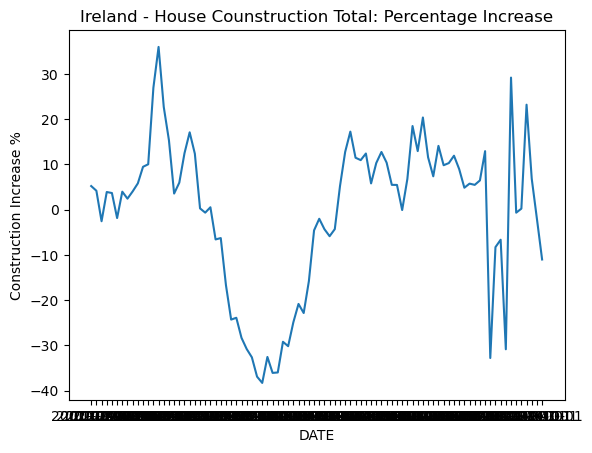

In [27]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Ireland_Construction_Total['DATE'], df_Ireland_Construction_Total['PRCNTO01IEQ659S'], label='Ireland');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Construction Increase %');  # Add a y-label to the axes.
ax.set_title("Ireland - House Counstruction Total: Percentage Increase");  # Add a title to the axes.

.

### Germany

In [28]:
# Printing the first 5 rows of the dataset
df_Germany_Construction_Total

,DATE,DEUPROCONMISMEI
0,1962-01-01,77.479509
1,1962-02-01,73.204260
2,1962-03-01,71.104138
3,1962-04-01,66.378863
4,1962-05-01,68.628994
...,...,...
728,2022-09-01,130.910909
729,2022-10-01,135.311276
730,2022-11-01,135.711309
731,2022-12-01,122.810234


In [29]:
#Shape command to see the dataframe dimensions
df_Germany_Construction_Total.shape

(733, 2)

In [30]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Germany_Construction_Total.describe()

,DEUPROCONMISMEI
count,733.000000
mean,93.211736
std,15.797589
min,57.978374
25%,81.679753
50%,90.005238
75%,102.048437
max,139.411618


In [31]:
#Info command to show data type of features, null values, and other important values. 
df_Germany_Construction_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             733 non-null    object 
 1   DEUPROCONMISMEI  733 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.6+ KB


In [32]:
#sns.boxplot(x=df_Germany_Construction_Total["DEUPROCONMISMEI"])

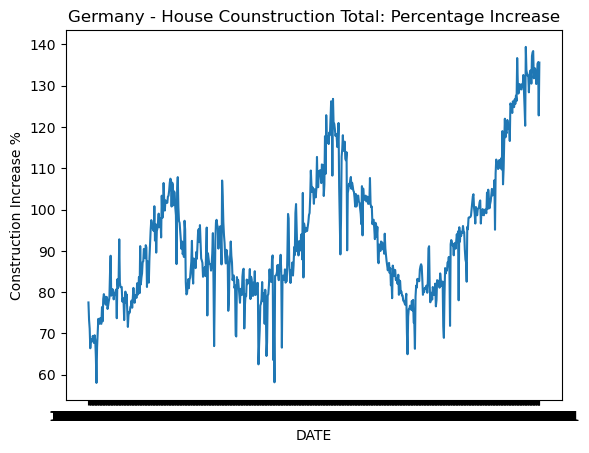

In [33]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Germany_Construction_Total['DATE'], df_Germany_Construction_Total['DEUPROCONMISMEI'], label='Germany');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Construction Increase %');  # Add a y-label to the axes.
ax.set_title("Germany - House Counstruction Total: Percentage Increase");  # Add a title to the axes.

.

### Italy

In [34]:
# Printing the first 5 rows of the dataset
df_Italy_Construction_Total

,DATE,ITAPROCONQISMEI
0,1995-01-01,111.500000
1,1995-04-01,112.366667
2,1995-07-01,115.033333
3,1995-10-01,121.933333
4,1996-01-01,110.666667
...,...,...
107,2021-10-01,129.766667
108,2022-01-01,137.400000
109,2022-04-01,137.900000
110,2022-07-01,133.633333


In [35]:
#Shape command to see the dataframe dimensions
df_Italy_Construction_Total.shape

(112, 2)

In [36]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Italy_Construction_Total.describe()

,ITAPROCONQISMEI
count,112.000000
mean,128.706250
std,23.720460
min,73.866667
25%,109.200000
50%,123.933333
75%,147.633333
max,179.966667


In [37]:
#Info command to show data type of features, null values, and other important values. 
df_Italy_Construction_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             112 non-null    object 
 1   ITAPROCONQISMEI  112 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [38]:
#sns.boxplot(x=df_Italy_Construction_Total["ITAPROCONQISMEI"])

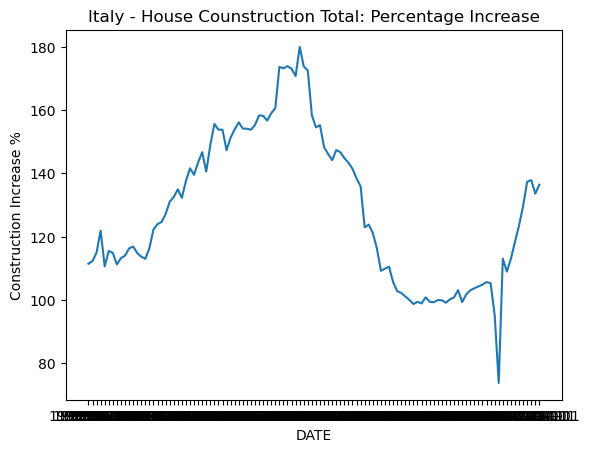

In [39]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Italy_Construction_Total['DATE'], df_Italy_Construction_Total['ITAPROCONQISMEI'], label='Italy');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Construction Increase %');  # Add a y-label to the axes.
ax.set_title("Italy - House Counstruction Total: Percentage Increase");  # Add a title to the axes.

.

### Construction Employment

In [40]:
#Datasets files names to be used:
#Ireland_Construction_Employment_LFEACNTTIEQ647S.csv
#Germany_Construction_Employment_LFEACNTTDEQ647S.csv
#Italy_Construction_Employment_LFEACNTTITQ647S.csv

#opening datasets with construction employment values
df_Ireland_Construction_Employment = pd.read_csv('Ireland_Construction_Employment_LFEACNTTIEQ647S.csv') 
df_Germany_Construction_Employment = pd.read_csv("Germany_Construction_Employment_LFEACNTTDEQ647S.csv");
df_Italy_Construction_Employment = pd.read_csv("Italy_Construction_Employment_LFEACNTTITQ647S.csv");

.

### Ireland

In [41]:
# Printing the first 5 rows of the dataset
df_Ireland_Construction_Employment

,DATE,LFEACNTTIEQ647S
0,1998-04-01,126229.425842
1,1998-07-01,128836.901138
2,1998-10-01,132480.413852
3,1999-01-01,137135.455495
4,1999-04-01,142543.398618
...,...,...
94,2021-10-01,152838.737068
95,2022-01-01,160361.689728
96,2022-04-01,167792.586137
97,2022-07-01,167830.669575


In [42]:
#Shape command to see the dataframe dimensions
df_Ireland_Construction_Employment.shape

(99, 2)

In [43]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Ireland_Construction_Employment.describe()

,LFEACNTTIEQ647S
count,99.000000
mean,156360.637440
std,55736.207614
min,82058.206713
25%,116025.325592
50%,145368.111684
75%,186548.902880
max,289259.093434


In [44]:
#Info command to show data type of features, null values, and other important values. 
df_Ireland_Construction_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             99 non-null     object 
 1   LFEACNTTIEQ647S  99 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [45]:
#sns.boxplot(x=df_Ireland_Construction_Employment["LFEACNTTIEQ647S"])

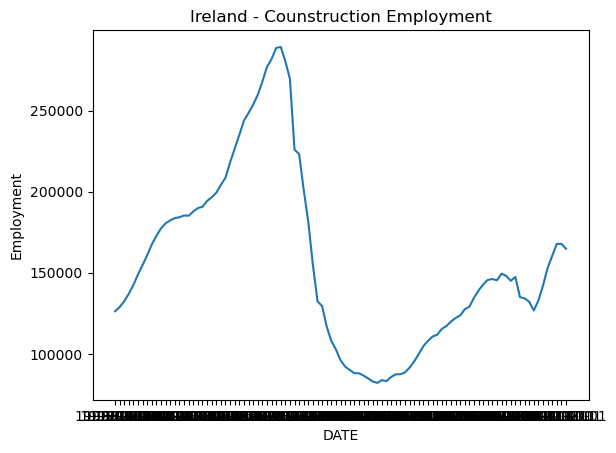

In [46]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Ireland_Construction_Employment['DATE'], df_Ireland_Construction_Employment['LFEACNTTIEQ647S'], label='Ireland');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Employment');  # Add a y-label to the axes.
ax.set_title("Ireland - Counstruction Employment");  # Add a title to the axes.

.

### Germany

In [47]:
# Printing the first 5 rows of the dataset
df_Germany_Construction_Employment

,DATE,LFEACNTTDEQ647S
0,2005-01-01,2.344554e+06
1,2005-04-01,2.415815e+06
2,2005-07-01,2.378816e+06
3,2005-10-01,2.443815e+06
4,2006-01-01,2.374848e+06
...,...,...
67,2021-10-01,2.479702e+06
68,2022-01-01,2.406048e+06
69,2022-04-01,2.508794e+06
70,2022-07-01,2.689579e+06


In [48]:
#Shape command to see the dataframe dimensions
df_Germany_Construction_Employment.shape

(72, 2)

In [49]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Germany_Construction_Employment.describe()

,LFEACNTTDEQ647S
count,7.200000e+01
mean,2.610892e+06
std,1.609396e+05
min,2.289618e+06
25%,2.489900e+06
50%,2.602302e+06
75%,2.743833e+06
max,2.902020e+06


In [50]:
#Info command to show data type of features, null values, and other important values. 
df_Germany_Construction_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             72 non-null     object 
 1   LFEACNTTDEQ647S  72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [51]:
#sns.boxplot(x=df_Germany_Construction_Employment["LFEACNTTDEQ647S"])

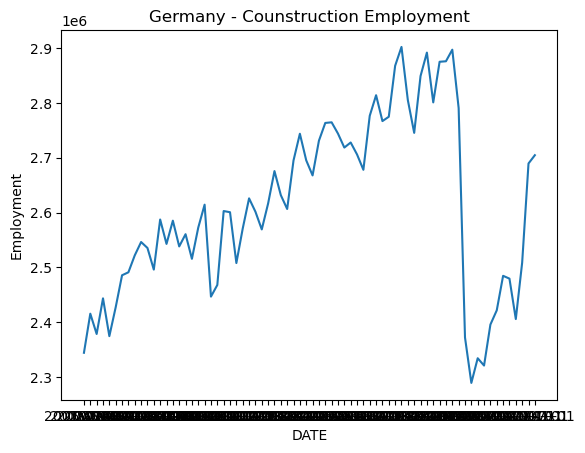

In [52]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Germany_Construction_Employment['DATE'], df_Germany_Construction_Employment['LFEACNTTDEQ647S'], label='Germany');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Employment');  # Add a y-label to the axes.
ax.set_title("Germany - Counstruction Employment");  # Add a title to the axes.

.

### Italy

In [53]:
# Printing the first 5 rows of the dataset
df_Italy_Construction_Employment

,DATE,LFEACNTTITQ647S
0,1998-01-01,1.542675e+06
1,1998-04-01,1.539075e+06
2,1998-07-01,1.541535e+06
3,1998-10-01,1.552514e+06
4,1999-01-01,1.551610e+06
...,...,...
95,2021-10-01,1.487452e+06
96,2022-01-01,1.509694e+06
97,2022-04-01,1.565436e+06
98,2022-07-01,1.561324e+06


In [54]:
#Shape command to see the dataframe dimensions
df_Italy_Construction_Employment.shape

(100, 2)

In [55]:
# Describe command for calculating some statistical data like percentile, mean and std of the numerical values of our DataFrame
df_Italy_Construction_Employment.describe()

,LFEACNTTITQ647S
count,1.000000e+02
mean,1.650458e+06
std,2.059210e+05
min,1.329927e+06
25%,1.466325e+06
50%,1.613873e+06
75%,1.854670e+06
max,1.967036e+06


In [56]:
#Info command to show data type of features, null values, and other important values. 
df_Italy_Construction_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             100 non-null    object 
 1   LFEACNTTITQ647S  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [57]:
#sns.boxplot(x=df_Italy_Construction_Employment["LFEACNTTITQ647S"])

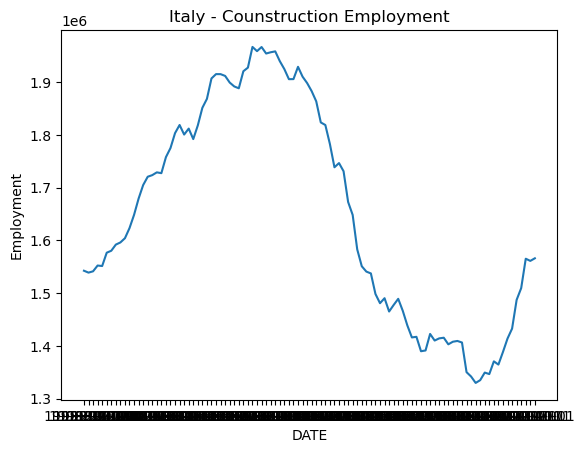

In [58]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Italy_Construction_Employment['DATE'], df_Italy_Construction_Employment['LFEACNTTITQ647S'], label='Italy');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Employment');  # Add a y-label to the axes.
ax.set_title("Italy - Counstruction Employment");  # Add a title to the axes.

.

### Total Population 

In [59]:
#Datasets files names to be used:
#Ireland_Population_Total_POPTOTIEA647NWDB.csv  
#Germany_Population_Total_POPTOTDEA647NWDB.csv  
#Italy_Population_Total_POPTOTITA647NWDB.csv    

#opening datasets with Total population values
df_Ireland_Population_Total = pd.read_csv('Ireland_Population_Total_POPTOTIEA647NWDB.csv') 
df_Germany_Population_Total = pd.read_csv("Germany_Population_Total_POPTOTDEA647NWDB.csv");
df_Italy_Population_Total = pd.read_csv("Italy_Population_Total_POPTOTITA647NWDB.csv");

#### Ireland

In [60]:
df_Ireland_Population_Total

,DATE,POPTOTIEA647NWDB
0,1960-01-01,2828600.0
1,1961-01-01,2824400.0
2,1962-01-01,2836050.0
3,1963-01-01,2852650.0
4,1964-01-01,2866550.0
...,...,...
57,2017-01-01,4807388.0
58,2018-01-01,4867316.0
59,2019-01-01,4934340.0
60,2020-01-01,4985382.0


In [61]:
df_Ireland_Population_Total.shape

(62, 2)

In [62]:
df_Ireland_Population_Total.describe()

,POPTOTIEA647NWDB
count,6.200000e+01
mean,3.712753e+06
std,6.637354e+05
min,2.824400e+06
25%,3.201675e+06
50%,3.539874e+06
75%,4.245172e+06
max,5.033165e+06


In [63]:
df_Ireland_Population_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              62 non-null     object 
 1   POPTOTIEA647NWDB  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [64]:
#sns.boxplot(x=df_Ireland_Population_Total["POPTOTIEA647NWDB"])

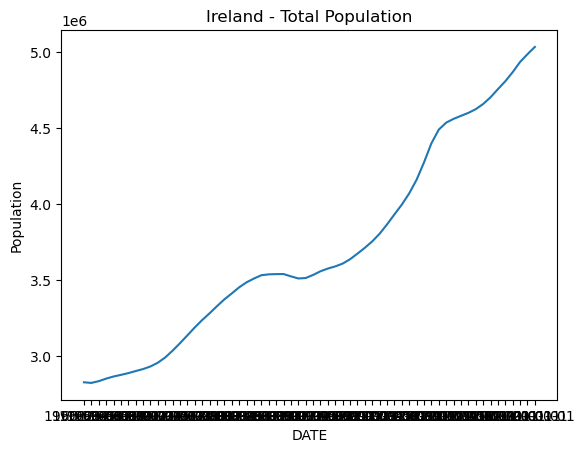

In [65]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Ireland_Population_Total['DATE'], df_Ireland_Population_Total['POPTOTIEA647NWDB'], label='Ireland');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Population');  # Add a y-label to the axes.
ax.set_title("Ireland - Total Population");  # Add a title to the axes.

.

#### Germany

In [66]:
df_Germany_Population_Total

,DATE,POPTOTDEA647NWDB
0,1960-01-01,72814900.0
1,1961-01-01,73377632.0
2,1962-01-01,74025784.0
3,1963-01-01,74714353.0
4,1964-01-01,75318337.0
...,...,...
57,2017-01-01,82657002.0
58,2018-01-01,82905782.0
59,2019-01-01,83092962.0
60,2020-01-01,83160871.0


In [67]:
df_Germany_Population_Total.shape

(62, 2)

In [68]:
df_Germany_Population_Total.describe()

,POPTOTDEA647NWDB
count,6.200000e+01
mean,7.966793e+07
std,2.626617e+06
min,7.281490e+07
25%,7.812683e+07
50%,7.972346e+07
75%,8.208698e+07
max,8.319608e+07


In [69]:
df_Germany_Population_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              62 non-null     object 
 1   POPTOTDEA647NWDB  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [70]:
#sns.boxplot(x=df_Germany_Population_Total["POPTOTDEA647NWDB"])

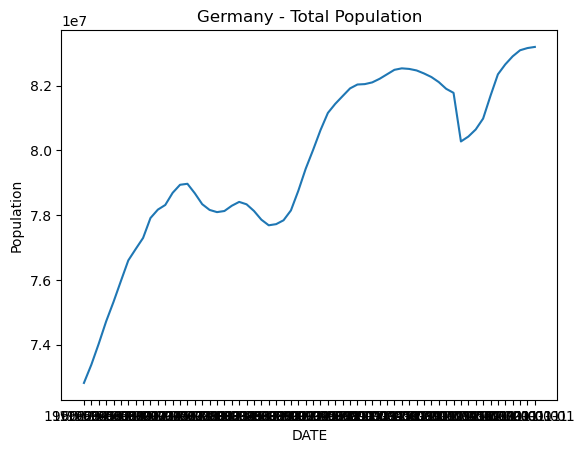

In [71]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Germany_Population_Total['DATE'], df_Germany_Population_Total['POPTOTDEA647NWDB'], label='Germany');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Population');  # Add a y-label to the axes.
ax.set_title("Germany - Total Population");  # Add a title to the axes.

.

#### Italy

In [72]:
df_Italy_Population_Total

,DATE,POPTOTITA647NWDB
0,1960-01-01,50199700.0
1,1961-01-01,50536350.0
2,1962-01-01,50879450.0
3,1963-01-01,51252000.0
4,1964-01-01,51675350.0
...,...,...
57,2017-01-01,60536709.0
58,2018-01-01,60421760.0
59,2019-01-01,59729081.0
60,2020-01-01,59438851.0


In [73]:
df_Italy_Population_Total.shape

(62, 2)

In [74]:
df_Italy_Population_Total.describe()

,POPTOTITA647NWDB
count,6.200000e+01
mean,5.649865e+07
std,2.638827e+06
min,5.019970e+07
25%,5.551032e+07
50%,5.673888e+07
75%,5.810036e+07
max,6.078914e+07


In [75]:
df_Italy_Population_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              62 non-null     object 
 1   POPTOTITA647NWDB  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [76]:
#sns.boxplot(x=df_Italy_Population_Total["POPTOTITA647NWDB"])

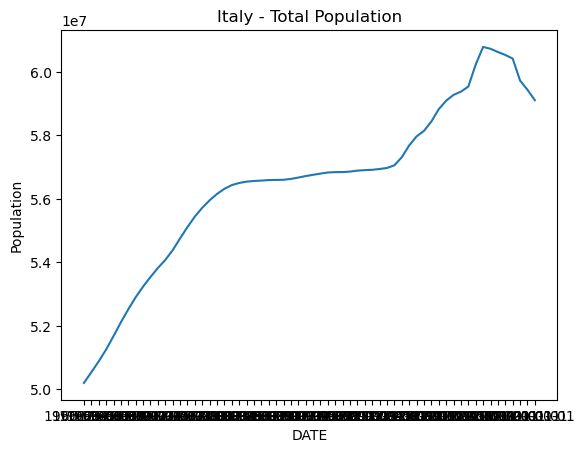

In [77]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Italy_Population_Total['DATE'], df_Italy_Population_Total['POPTOTITA647NWDB'], label='Italy');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Population');  # Add a y-label to the axes.
ax.set_title("Italy - Total Population");  # Add a title to the axes.

.

### Total Active Population

In [78]:
#Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv  
#Germany_Population_Total_Active_LFAC64TTDEQ647S.csv  
#Italy_Population_Total_Active_LFAC64TTITQ647S.csv    

#opening datasets with construction Total values
df_Ireland_Population_Total_Active = pd.read_csv('Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv') 
df_Germany_Population_Total_Active = pd.read_csv("Germany_Population_Total_Active_LFAC64TTDEQ647S.csv");
df_Italy_Population_Total_Active = pd.read_csv("Italy_Population_Total_Active_LFAC64TTITQ647S.csv");

.

#### Irleand

In [79]:
df_Ireland_Population_Total_Active

,DATE,LFAC64TTIEQ647S
0,1999-04-01,1.672245e+06
1,1999-07-01,1.691142e+06
2,1999-10-01,1.705536e+06
3,2000-01-01,1.717290e+06
4,2000-04-01,1.732092e+06
...,...,...
90,2021-10-01,2.517276e+06
91,2022-01-01,2.546753e+06
92,2022-04-01,2.566359e+06
93,2022-07-01,2.559517e+06


In [80]:
df_Ireland_Population_Total_Active.shape

(95, 2)

In [81]:
df_Ireland_Population_Total_Active.describe()

,LFAC64TTIEQ647S
count,9.500000e+01
mean,2.149212e+06
std,2.249915e+05
min,1.672245e+06
25%,1.978178e+06
50%,2.200679e+06
75%,2.296393e+06
max,2.580572e+06


In [82]:
df_Ireland_Population_Total_Active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             95 non-null     object 
 1   LFAC64TTIEQ647S  95 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [83]:
#sns.boxplot(x=df_Ireland_Population_Total_Active["LFAC64TTIEQ647S"])

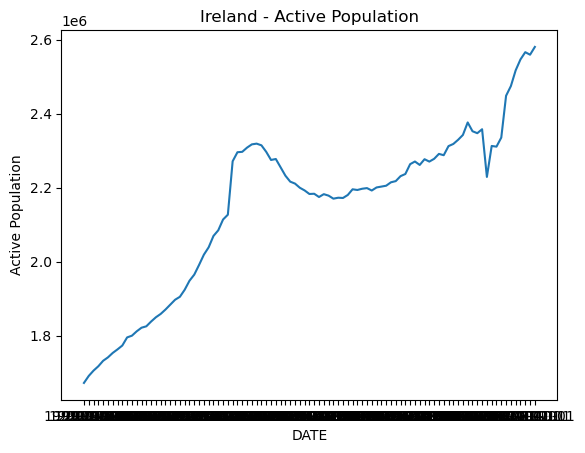

In [84]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Ireland_Population_Total_Active['DATE'], df_Ireland_Population_Total_Active['LFAC64TTIEQ647S'], label='Ireland');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Active Population');  # Add a y-label to the axes.
ax.set_title("Ireland - Active Population");  # Add a title to the axes.

.

#### Germany

In [85]:
df_Germany_Population_Total_Active

,DATE,LFAC64TTDEQ647S
0,2005-01-01,4.011564e+07
1,2005-04-01,4.039664e+07
2,2005-07-01,4.053807e+07
3,2005-10-01,4.059434e+07
4,2006-01-01,4.073612e+07
...,...,...
67,2021-10-01,4.192737e+07
68,2022-01-01,4.220937e+07
69,2022-04-01,4.252024e+07
70,2022-07-01,4.249955e+07


In [86]:
df_Germany_Population_Total_Active.shape

(72, 2)

In [87]:
df_Germany_Population_Total_Active.describe()

,LFAC64TTDEQ647S
count,7.200000e+01
mean,4.083035e+07
std,7.834692e+05
min,3.942293e+07
25%,4.023920e+07
50%,4.087748e+07
75%,4.138527e+07
max,4.261164e+07


In [88]:
df_Germany_Population_Total_Active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             72 non-null     object 
 1   LFAC64TTDEQ647S  72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [89]:
#sns.boxplot(x=df_Germany_Population_Total_Active["LFAC64TTDEQ647S"])

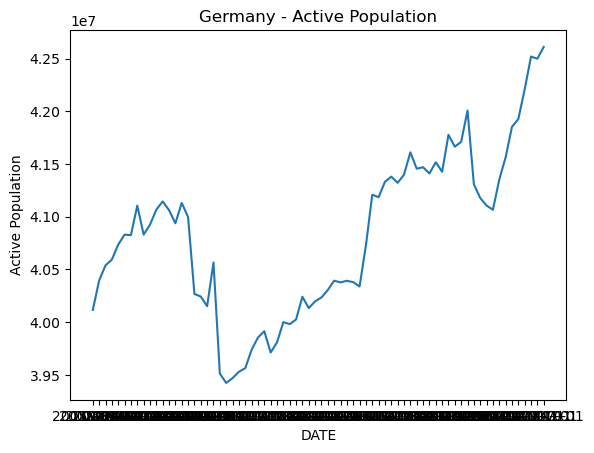

In [90]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Germany_Population_Total_Active['DATE'], df_Germany_Population_Total_Active['LFAC64TTDEQ647S'], label='Germany');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Active Population');  # Add a y-label to the axes.
ax.set_title("Germany - Active Population");  # Add a title to the axes.

.

#### Italy

In [91]:
df_Italy_Population_Total_Active

,DATE,LFAC64TTITQ647S
0,1998-01-01,2.263819e+07
1,1998-04-01,2.283518e+07
2,1998-07-01,2.287816e+07
3,1998-10-01,2.295227e+07
4,1999-01-01,2.296320e+07
...,...,...
95,2021-10-01,2.437918e+07
96,2022-01-01,2.430532e+07
97,2022-04-01,2.451063e+07
98,2022-07-01,2.439203e+07


In [92]:
df_Italy_Population_Total_Active.shape

(100, 2)

In [93]:
df_Italy_Population_Total_Active.describe()

,LFAC64TTITQ647S
count,1.000000e+02
mean,2.413558e+07
std,6.069696e+05
min,2.263819e+07
25%,2.381158e+07
50%,2.411511e+07
75%,2.459639e+07
max,2.526515e+07


In [94]:
df_Italy_Population_Total_Active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             100 non-null    object 
 1   LFAC64TTITQ647S  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [95]:
#sns.boxplot(x=df_Italy_Population_Total_Active["LFAC64TTITQ647S"])

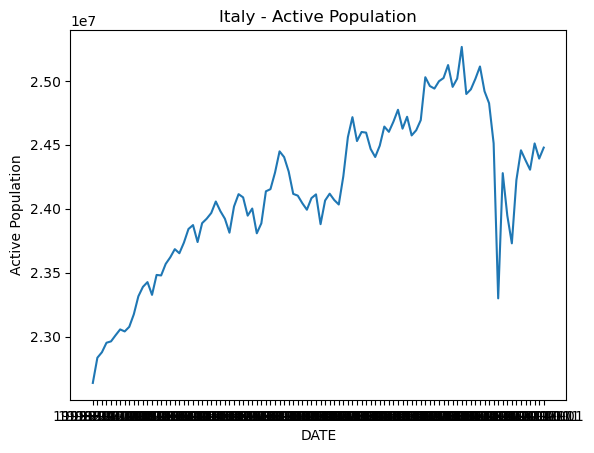

In [96]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_Italy_Population_Total_Active['DATE'], df_Italy_Population_Total_Active['LFAC64TTITQ647S'], label='Italy');  # Plot first line of data.

ax.set_xlabel('DATE');  # Add an x-label to the axes.
ax.set_ylabel('Active Population');  # Add a y-label to the axes.
ax.set_title("Italy - Active Population");  # Add a title to the axes.

.

# Data Preparation

## House Construction Cost

In [254]:
# Default values to House Construction Cost
# INDEX = 1975 
# Range = 1975 to 2016
# Period = years

.

### Ireland Construction Cost

In [255]:
#IRELAND HOUSE CONSTRUCTION COST

#Load the dataset
df_Ireland_Construction_Cost = pd.read_csv('Ireland_Construction_Cost_Index_HSA09.20230502094114.csv') 

#Removing the uselles columns from our datset
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('STATISTIC', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('STATISTIC Label', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('TLIST(A1)', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('C02196V02652', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('UNIT', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('State', axis=1)

#Rename Column as a main value
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.rename({'VALUE': 'Ireland_Construction_Cost'}, axis=1)

# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)

for i, row in df_Ireland_Construction_Cost.iterrows():
    if int(row['Year']) == 1975: 
        #set the value of 100 (new index) for the first row and capture the old first value
        firstValue = float(row['Ireland_Construction_Cost'])
        df_Ireland_Construction_Cost.at[i,'Ireland_Construction_Cost'] = 100 
    else:
        #calculating the new percentage based on a new base index 
        # the actual value is calculated based on the past value
        newValue = float(row['Ireland_Construction_Cost']) * 100 / firstValue
        df_Ireland_Construction_Cost.at[i,'Ireland_Construction_Cost'] = newValue

# Reset Index to equalize after the drops
df_Ireland_Construction_Cost.reset_index(drop=True, inplace=True) 
 
#Convert Year to Int type
df_Ireland_Construction_Cost['Year'] = df_Ireland_Construction_Cost['Year'].astype(int);
#Convert Construction_Cost to Float type and round
df_Ireland_Construction_Cost['Ireland_Construction_Cost'] = round(df_Ireland_Construction_Cost['Ireland_Construction_Cost'], 0).astype(float);


In [256]:
#Printing the first 5 rows of the resulted dataset after the preparation
df_Ireland_Construction_Cost.head()

,Year,Ireland_Construction_Cost
0,1975,100.0
1,1976,114.0
2,1977,134.0
3,1978,148.0
4,1979,171.0


### Germany Construction Cost

In [257]:
#GERMANY HOUSE CONSTRUCTION COST

# Loading the dataset 
df_Germany_Construction_Cost = pd.read_csv("Germany_Construction_Cost_Index_OPCNRE01DEQ661N.csv");

# Once Germany has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Construction_Cost.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Germany_Construction_Cost.at[i,'Year'] = df_Germany_Construction_Cost.at[i,'DATE'][0:4]
    df_Germany_Construction_Cost.at[i,'Month'] = df_Germany_Construction_Cost.at[i,'DATE'][5:7]
    # Remove all rows where year < 1975 and year > 2016
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Germany_Construction_Cost.at[i,'Year']) < 1975 or int(df_Germany_Construction_Cost.at[i,'Year']) > 2016 or int(df_Germany_Construction_Cost.at[i,'Month']) < 10:
        df_Germany_Construction_Cost.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Germany_Construction_Cost = df_Germany_Construction_Cost.drop('DATE', axis=1)
df_Germany_Construction_Cost = df_Germany_Construction_Cost.drop('Month', axis=1)

#Rename Coloumn as more friendly name
df_Germany_Construction_Cost = df_Germany_Construction_Cost.rename({'OPCNRE01DEQ661N': 'Germany_Construction_Cost'}, axis=1)
df_Germany_Construction_Cost = df_Germany_Construction_Cost.rename({'DATE': 'Year'}, axis = 1)

# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)
for i, row in df_Germany_Construction_Cost.iterrows():
    if int(row['Year']) == 1975: 
        #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Germany_Construction_Cost'])
        df_Germany_Construction_Cost.at[i,'Germany_Construction_Cost'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Germany_Construction_Cost']) * 100 / firstValue
        df_Germany_Construction_Cost.at[i,'Germany_Construction_Cost'] = newValue

# Reset Index to equalize after the drops
df_Germany_Construction_Cost.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Construction_Cost['Year'] = df_Germany_Construction_Cost['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Cost['Germany_Construction_Cost'] = round(df_Germany_Construction_Cost['Germany_Construction_Cost'], 0).astype(float);


In [258]:
df_Germany_Construction_Cost

,Germany_Construction_Cost,Year
0,100.0,1975
1,105.0,1976
2,109.0,1977
3,117.0,1978
4,129.0,1979
5,141.0,1980
6,148.0,1981
7,150.0,1982
8,155.0,1983
9,158.0,1984


### Italy Construction Cost

In [259]:
#ITALY HOUSE CONSTRUCTION COST

# Loading the dataset
df_Italy_Construction_Cost = pd.read_csv("Italy_Construction_Cost_Index_OPCNRE01ITM661N.csv");

# Once Italy has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Italy_Construction_Cost.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Italy_Construction_Cost.at[i,'Year'] = df_Italy_Construction_Cost.at[i,'DATE'][0:4]
    df_Italy_Construction_Cost.at[i,'Month'] = df_Italy_Construction_Cost.at[i,'DATE'][5:7]
    # Remove all rows where year < 1975 and year > 2016
    # Remove month registers keeping only the last month per each year
    if int(df_Italy_Construction_Cost.at[i,'Year']) < 1975 or int(df_Italy_Construction_Cost.at[i,'Year']) > 2016 or int(df_Italy_Construction_Cost.at[i,'Month']) < 12:
        df_Italy_Construction_Cost.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Construction_Cost = df_Italy_Construction_Cost.drop('DATE', axis=1)
df_Italy_Construction_Cost = df_Italy_Construction_Cost.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Construction_Cost = df_Italy_Construction_Cost.rename({'OPCNRE01ITM661N': 'Italy_Construction_Cost'}, axis=1)
df_Italy_Construction_Cost = df_Italy_Construction_Cost.rename({'DATE': 'Year'}, axis=1)

# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)
for i, row in df_Italy_Construction_Cost.iterrows():
    if int(row['Year']) == 1975: 
        #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Italy_Construction_Cost'])
        df_Italy_Construction_Cost.at[i,'Italy_Construction_Cost'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Italy_Construction_Cost']) * 100 / firstValue
        df_Italy_Construction_Cost.at[i,'Italy_Construction_Cost'] = newValue

# Reset Index to equalize after the drops
df_Italy_Construction_Cost.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Construction_Cost['Year'] = df_Italy_Construction_Cost['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Construction_Cost['Italy_Construction_Cost'] = round(df_Italy_Construction_Cost['Italy_Construction_Cost'], 0).astype(float);



In [260]:
df_Italy_Construction_Cost.head()

,Italy_Construction_Cost,Year
0,100.0,1975
1,127.0,1976
2,146.0,1977
3,169.0,1978
4,210.0,1979


### All Countries House Construction Cost

In [261]:
# Now its time to merge the datasets about cost
# 
#df_Ireland_Construction_Cost 
#df_Germany_Construction_Cost 
#df_Italy_Construction_Cost

# Merging all the datasets representing House Construction Cost
df1 = pd.DataFrame.merge(df_Ireland_Construction_Cost,df_Germany_Construction_Cost,on='Year')
df_All_Countries_Construction_Cost = pd.DataFrame.merge(df1, df_Italy_Construction_Cost,on='Year')

In [262]:
df_All_Countries_Construction_Cost

,Year,Ireland_Construction_Cost,Germany_Construction_Cost,Italy_Construction_Cost
0,1975,100.0,100.0,100.0
1,1976,114.0,105.0,127.0
2,1977,134.0,109.0,146.0
3,1978,148.0,117.0,169.0
4,1979,171.0,129.0,210.0
5,1980,212.0,141.0,260.0
6,1981,252.0,148.0,314.0
7,1982,287.0,150.0,363.0
8,1983,311.0,155.0,405.0
9,1984,342.0,158.0,432.0


## House Total Construction

.

In [263]:
# Default values to Total Construction
# INDEX = 2001 
# Range = 2001 to 2022
# Period = years

#Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv  - INDEX = Growth rate same period previous year
#Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv  - INDEX = 2015
#Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv    - INDEX = 2015

#opening datasets with construction Total values
df_Ireland_Construction_Total = pd.read_csv('Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv') 
df_Germany_Construction_Total = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv");
df_Italy_Construction_Total = pd.read_csv("Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv");

### Ireland Total Construction

In [264]:
#IRELAND TOTAL CONSTRUCTION

# Loading the dataset
df_Ireland_Construction_Total = pd.read_csv('Ireland_Construction_Total_Construction.csv') 

#Iterate with the dataset to create independent columns year and month based on DATE column
for i, row in df_Ireland_Construction_Total.iterrows():
    df_Ireland_Construction_Total.at[i,'Year'] = df_Ireland_Construction_Total.at[i,'DATE'][0:4]
    df_Ireland_Construction_Total.at[i,'Month'] = df_Ireland_Construction_Total.at[i,'DATE'][5:7]    
    
#Rename column as a main value
df_Ireland_Construction_Total = df_Ireland_Construction_Total.rename({'PRCNTO01IEQ657S': 'Ireland_Construction_Total'}, axis=1)
df_Ireland_Construction_Total = df_Ireland_Construction_Total.rename({'DATE': 'Date'}, axis=1)

# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
previousValue = float(0)
for i, row in df_Ireland_Construction_Total.iterrows():
    if int(row['Year']) == 2001: 
        #set the value of 100 (new index) and capture the old first value
        previousValue = float(100)
        df_Ireland_Construction_Total.at[i,'Ireland_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 2001 = 100
        newValue = (float(row['Ireland_Construction_Total'])/100 * previousValue) + previousValue
        previousValue = newValue
        df_Ireland_Construction_Total.at[i,'Ireland_Construction_Total'] = newValue

#Iterate on our dataset to remove the years which other countries doesnt have
for i, row in df_Ireland_Construction_Total.iterrows():
    if int(df_Ireland_Construction_Total.at[i,'Year']) < 2001 or int(df_Ireland_Construction_Total.at[i,'Year']) > 2022 or int(df_Ireland_Construction_Total.at[i,'Month']) < 10:
        df_Ireland_Construction_Total.drop(i, inplace=True)
        
#Removing the uselles collumns from our datset
df_Ireland_Construction_Total = df_Ireland_Construction_Total.drop('Date', axis=1)
df_Ireland_Construction_Total = df_Ireland_Construction_Total.drop('Month', axis=1)
       
# Reset Index to equalize after the drops
df_Ireland_Construction_Total.reset_index(drop=True, inplace=True)
        
#Convert Year to Int type
df_Ireland_Construction_Total['Year'] = df_Ireland_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Construction_Total['Ireland_Construction_Total'] = round(df_Ireland_Construction_Total['Ireland_Construction_Total'], 0).astype(float);

In [265]:
df_Ireland_Construction_Total.head()

,Ireland_Construction_Total,Year
0,100.0,2001
1,102.0,2002
2,113.0,2003
3,130.0,2004
4,152.0,2005


### Germany Total Construction

In [266]:
#GERMANY TOTAL CONSTRUCTION

#Loading the dataset
df_Germany_Construction_Total = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv")

# Once Germany has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Construction_Total.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Germany_Construction_Total.at[i,'Year'] = df_Germany_Construction_Total.at[i,'DATE'][0:4]
    df_Germany_Construction_Total.at[i,'Month'] = df_Germany_Construction_Total.at[i,'DATE'][5:7]
    # Remove all rows where year < 2001 and year > 2022
    # Remove month registers keeping only the last month per each year 
    if int(df_Germany_Construction_Total.at[i,'Year']) < 2001 or int(df_Germany_Construction_Total.at[i,'Year']) > 2022 or int(df_Germany_Construction_Total.at[i,'Month']) < 12:
        df_Germany_Construction_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Germany_Construction_Total = df_Germany_Construction_Total.drop('DATE', axis=1)
df_Germany_Construction_Total = df_Germany_Construction_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Germany_Construction_Total = df_Germany_Construction_Total.rename({'DEUPROCONMISMEI': 'Germany_Construction_Total'}, axis=1)

# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)
for i, row in df_Germany_Construction_Total.iterrows():
    if int(row['Year']) == 2001: 
        #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Germany_Construction_Total'])
        df_Germany_Construction_Total.at[i,'Germany_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 2001 = 100
        newValue = float(row['Germany_Construction_Total']) * 100 / firstValue
        df_Germany_Construction_Total.at[i,'Germany_Construction_Total'] = newValue

# Reset Index to equalize after the drops
df_Germany_Construction_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Construction_Total['Year'] = df_Germany_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Total['Germany_Construction_Total'] = round(df_Germany_Construction_Total['Germany_Construction_Total'], 0).astype(float);

In [267]:
df_Germany_Construction_Total.head()

,Germany_Construction_Total,Year
0,100.0,2001
1,89.0,2002
2,92.0,2003
3,85.0,2004
4,85.0,2005


### Italy Total Contruction

In [268]:
#ITALY TOTAL CONSTRUCTION

#Loading the dataset
df_Italy_Construction_Total = pd.read_csv("Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv");

# Once Italy has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Italy_Construction_Total.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Italy_Construction_Total.at[i,'Year'] = df_Italy_Construction_Total.at[i,'DATE'][0:4]
    df_Italy_Construction_Total.at[i,'Month'] = df_Italy_Construction_Total.at[i,'DATE'][5:7]
    # Remove all rows where year < 1975 and year > 2016
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Italy_Construction_Total.at[i,'Year']) < 2001 or int(df_Italy_Construction_Total.at[i,'Year']) > 2022 or int(df_Italy_Construction_Total.at[i,'Month']) < 10:
        df_Italy_Construction_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Construction_Total = df_Italy_Construction_Total.drop('DATE', axis=1)
df_Italy_Construction_Total = df_Italy_Construction_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Construction_Total = df_Italy_Construction_Total.rename({'ITAPROCONQISMEI': 'Italy_Construction_Total'}, axis=1)


# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)
for i, row in df_Italy_Construction_Total.iterrows():
    if int(row['Year']) == 2001: 
        #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Italy_Construction_Total'])
        df_Italy_Construction_Total.at[i,'Italy_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Italy_Construction_Total']) * 100 / firstValue
        df_Italy_Construction_Total.at[i,'Italy_Construction_Total'] = newValue

# Reset Index to equalize after the drops
df_Italy_Construction_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Construction_Total['Year'] = df_Italy_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Construction_Total['Italy_Construction_Total'] = round(df_Italy_Construction_Total['Italy_Construction_Total'], 0).astype(float);

In [269]:
df_Italy_Construction_Total.head()

,Italy_Construction_Total,Year
0,100.0,2001
1,108.0,2002
2,105.0,2003
3,107.0,2004
4,110.0,2005


### All Countries Total Construction

In [270]:
# Now its time to merge the datasets
#df_Ireland_Construction_Total
#df_Germany_Construction_Total
#df_Italy_Construction_Total

#Merging the datasets based on Year
df2 = pd.DataFrame.merge(df_Ireland_Construction_Total, df_Germany_Construction_Total, on='Year')
df_All_Countries_Construction_Total = pd.DataFrame.merge(df2, df_Italy_Construction_Total, on='Year')

In [271]:
df_All_Countries_Construction_Total

,Ireland_Construction_Total,Year,Germany_Construction_Total,Italy_Construction_Total
0,100.0,2001,100.0,100.0
1,102.0,2002,89.0,108.0
2,113.0,2003,92.0,105.0
3,130.0,2004,85.0,107.0
4,152.0,2005,85.0,110.0
5,153.0,2006,94.0,121.0
6,116.0,2007,90.0,119.0
7,78.0,2008,90.0,110.0
8,50.0,2009,90.0,102.0
9,37.0,2010,78.0,101.0


## Construction Employment 

In [272]:
# Default values to Construction Employment 
# Range = 2001 to 2022
# Period = years

#Ireland_Construction_Employment_LFEACNTTIEQ647S.csv  
#Germany_Construction_Employment_LFEACNTTDEQ647S.csv  
#Italy_Construction_Employment_LFEACNTTITQ647S.csv    

#opening datasets with construction Total values
df_Ireland_Construction_Employment = pd.read_csv('Ireland_Construction_Employment_LFEACNTTIEQ647S.csv') 
df_Germany_Construction_Employment = pd.read_csv("Germany_Construction_Employment_LFEACNTTDEQ647S.csv");
df_Italy_Construction_Employment = pd.read_csv("Italy_Construction_Employment_LFEACNTTITQ647S.csv");

### Ireland Construction Employment 

In [273]:
#IRELAND CONSTRUCTION EMPLOYMENT

#Loading the dataset
df_Ireland_Construction_Employment = pd.read_csv('Ireland_Construction_Employment_LFEACNTTIEQ647S.csv') 

# Once Ireland has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Ireland_Construction_Employment.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Ireland_Construction_Employment.at[i,'Year'] = df_Ireland_Construction_Employment.at[i,'DATE'][0:4]
    df_Ireland_Construction_Employment.at[i,'Month'] = df_Ireland_Construction_Employment.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Ireland_Construction_Employment.at[i,'Year']) < 2005 or int(df_Ireland_Construction_Employment.at[i,'Year']) > 2022 or int(df_Ireland_Construction_Employment.at[i,'Month']) < 10:
        df_Ireland_Construction_Employment.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Ireland_Construction_Employment = df_Ireland_Construction_Employment.drop('DATE', axis=1)
df_Ireland_Construction_Employment = df_Ireland_Construction_Employment.drop('Month', axis=1)

#Rename Column as a main value
df_Ireland_Construction_Employment = df_Ireland_Construction_Employment.rename({'LFEACNTTIEQ647S': 'Ireland_Construction_Employment'}, axis=1)

# Reset Index to equalize after the drops
df_Ireland_Construction_Employment.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Ireland_Construction_Employment['Year'] = df_Ireland_Construction_Employment['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Construction_Employment['Ireland_Construction_Employment'] = round(df_Ireland_Construction_Employment['Ireland_Construction_Employment'], 0).astype(float);

In [274]:
df_Ireland_Construction_Employment.head()

,Ireland_Construction_Employment,Year
0,253629.0,2005
1,281745.0,2006
2,269553.0,2007
3,181219.0,2008
4,116739.0,2009


### Germany Construction Employment

In [275]:
#GERMANY CONSTRUCTION EMPLOYMENT

#Loading the dataset
df_Germany_Construction_Employment = pd.read_csv("Germany_Construction_Employment_LFEACNTTDEQ647S.csv");

# Once Germany has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Construction_Employment.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Germany_Construction_Employment.at[i,'Year'] = df_Germany_Construction_Employment.at[i,'DATE'][0:4]
    df_Germany_Construction_Employment.at[i,'Month'] = df_Germany_Construction_Employment.at[i,'DATE'][5:7]
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Germany_Construction_Employment.at[i,'Month']) < 10:
        df_Germany_Construction_Employment.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Germany_Construction_Employment = df_Germany_Construction_Employment.drop('DATE', axis=1)
df_Germany_Construction_Employment = df_Germany_Construction_Employment.drop('Month', axis=1)

#Rename Column as a main value
df_Germany_Construction_Employment = df_Germany_Construction_Employment.rename({'LFEACNTTDEQ647S': 'Germany_Construction_Employment'}, axis=1)

# Reset Index to equalize after the drops
df_Germany_Construction_Employment.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Construction_Employment['Year'] = df_Germany_Construction_Employment['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Employment['Germany_Construction_Employment'] = round(df_Germany_Construction_Employment['Germany_Construction_Employment'], 0).astype(float);

In [276]:
df_Germany_Construction_Employment.head()

,Germany_Construction_Employment,Year
0,2443815.0,2005
1,2491256.0,2006
2,2496163.0,2007
3,2538398.0,2008
4,2614541.0,2009


### Italy Construction Employment 

In [277]:
#ITALY CONSTRUCTION EMPLOYMENT

#Loading the dataset
df_Italy_Construction_Employment = pd.read_csv("Italy_Construction_Employment_LFEACNTTITQ647S.csv");

# Once Italy has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Italy_Construction_Employment.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Italy_Construction_Employment.at[i,'Year'] = df_Italy_Construction_Employment.at[i,'DATE'][0:4]
    df_Italy_Construction_Employment.at[i,'Month'] = df_Italy_Construction_Employment.at[i,'DATE'][5:7]
    # Remove all rows where year < 1975 and year > 2016
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Italy_Construction_Employment.at[i,'Year']) < 2005 or int(df_Italy_Construction_Employment.at[i,'Year']) > 2022 or int(df_Italy_Construction_Employment.at[i,'Month']) < 10:
        df_Italy_Construction_Employment.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Construction_Employment = df_Italy_Construction_Employment.drop('DATE', axis=1)
df_Italy_Construction_Employment = df_Italy_Construction_Employment.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Construction_Employment = df_Italy_Construction_Employment.rename({'LFEACNTTITQ647S': 'Italy_Construction_Employment'}, axis=1)

# Reset Index to equalize after the drops
df_Italy_Construction_Employment.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Construction_Employment['Year'] = df_Italy_Construction_Employment['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Construction_Employment['Italy_Construction_Employment'] = round(df_Italy_Construction_Employment['Italy_Construction_Employment'], 0).astype(float);

In [278]:
df_Italy_Construction_Employment.head()

,Italy_Construction_Employment,Year
0,1912036.0,2005
1,1920929.0,2006
2,1966857.0,2007
3,1940075.0,2008
4,1929324.0,2009


### All Countries Construction Employment

In [279]:
#Now its time to merge all datasets about Construction Employment
#df_Ireland_Construction_Employment 
#df_Germany_Construction_Employment
#df_Italy_Construction_Employment

#Merging all datasets
df3 = pd.DataFrame.merge(df_Ireland_Construction_Employment, df_Germany_Construction_Employment, on='Year')
df_All_Countries_Construction_Employment = pd.DataFrame.merge(df3, df_Italy_Construction_Employment, on='Year')

In [280]:
df_All_Countries_Construction_Employment

,Ireland_Construction_Employment,Year,Germany_Construction_Employment,Italy_Construction_Employment
0,253629.0,2005,2443815.0,1912036.0
1,281745.0,2006,2491256.0,1920929.0
2,269553.0,2007,2496163.0,1966857.0
3,181219.0,2008,2538398.0,1940075.0
4,116739.0,2009,2614541.0,1929324.0
5,92131.0,2010,2600748.0,1863844.0
6,86605.0,2011,2601715.0,1738833.0
7,83789.0,2012,2631845.0,1648450.0
8,87412.0,2013,2695318.0,1537525.0
9,99933.0,2014,2764595.0,1465328.0


## Population Total 

In [281]:
# Default values to Construction Employment 
# Range = 2005 to 2022
# Period = years

#Ireland_Population_Total_POPTOTIEA647NWDB.csv  
#Germany_Population_Total_POPTOTDEA647NWDB.csv  
#Italy_Population_Total_POPTOTITA647NWDB.csv    

#opening datasets with construction Total values
df_Ireland_Population_Total = pd.read_csv('Ireland_Population_Total_POPTOTIEA647NWDB.csv') 
df_Germany_Population_Total = pd.read_csv("Germany_Population_Total_POPTOTDEA647NWDB.csv");
df_Italy_Population_Total = pd.read_csv("Italy_Population_Total_POPTOTITA647NWDB.csv");

.

### Ireland Population Total

In [282]:
#Loading the dataset
df_Ireland_Population_Total = pd.read_csv("Ireland_Population_Total_POPTOTIEA647NWDB.csv");

# Once Ireland has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Ireland_Population_Total.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Ireland_Population_Total.at[i,'Year'] = df_Ireland_Population_Total.at[i,'DATE'][0:4]
    df_Ireland_Population_Total.at[i,'Month'] = df_Ireland_Population_Total.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    if int(df_Ireland_Population_Total.at[i,'Year']) < 2005 or int(df_Ireland_Population_Total.at[i,'Year']) > 2022:
        df_Ireland_Population_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Ireland_Population_Total = df_Ireland_Population_Total.drop('DATE', axis=1)
df_Ireland_Population_Total = df_Ireland_Population_Total.drop('Month', axis=1)

#Rename Column as a main value
df_Ireland_Population_Total = df_Ireland_Population_Total.rename({'POPTOTIEA647NWDB': 'Ireland_Population_Total'}, axis=1)

# Reset Index to equalize after the drops
df_Ireland_Population_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Ireland_Population_Total['Year'] = df_Ireland_Population_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Population_Total['Ireland_Population_Total'] = round(df_Ireland_Population_Total['Ireland_Population_Total'], 0).astype(float);

In [283]:
df_Ireland_Population_Total

,Ireland_Population_Total,Year
0,4159914.0,2005
1,4273591.0,2006
2,4398942.0,2007
3,4489544.0,2008
4,4535375.0,2009
5,4560155.0,2010
6,4580084.0,2011
7,4599533.0,2012
8,4623816.0,2013
9,4657740.0,2014


### Germany Population Total

In [284]:
#Loading the dataset
df_Germany_Population_Total = pd.read_csv("Germany_Population_Total_POPTOTDEA647NWDB.csv");

# Once Germany has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Population_Total.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Germany_Population_Total.at[i,'Year'] = df_Germany_Population_Total.at[i,'DATE'][0:4]
    df_Germany_Population_Total.at[i,'Month'] = df_Germany_Population_Total.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Germany_Population_Total.at[i,'Year']) < 2005 or int(df_Germany_Population_Total.at[i,'Year']) > 2022:
        df_Germany_Population_Total.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Germany_Population_Total = df_Germany_Population_Total.drop('DATE', axis=1)
df_Germany_Population_Total = df_Germany_Population_Total.drop('Month', axis=1)

#Rename Column as a main value
df_Germany_Population_Total = df_Germany_Population_Total.rename({'POPTOTDEA647NWDB': 'Germany_Population_Total'}, axis=1)

# Reset Index to equalize after the drops
df_Germany_Population_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Population_Total['Year'] = df_Germany_Population_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Population_Total['Germany_Population_Total'] = round(df_Germany_Population_Total['Germany_Population_Total'], 0).astype(float);

In [285]:
df_Germany_Population_Total

,Germany_Population_Total,Year
0,82469422.0,2005
1,82376451.0,2006
2,82266372.0,2007
3,82110097.0,2008
4,81902307.0,2009
5,81776930.0,2010
6,80274983.0,2011
7,80425823.0,2012
8,80645605.0,2013
9,80982500.0,2014


### Italy Population Total

In [286]:
#Loading the dataset
df_Italy_Population_Total = pd.read_csv("Italy_Population_Total_POPTOTITA647NWDB.csv");

# Once Italy has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Italy_Population_Total.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Italy_Population_Total.at[i,'Year'] = df_Italy_Population_Total.at[i,'DATE'][0:4]
    df_Italy_Population_Total.at[i,'Month'] = df_Italy_Population_Total.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    if int(df_Italy_Population_Total.at[i,'Year']) < 2005 or int(df_Italy_Population_Total.at[i,'Year']) > 2022:
        df_Italy_Population_Total.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Italy_Population_Total = df_Italy_Population_Total.drop('DATE', axis=1)
df_Italy_Population_Total = df_Italy_Population_Total.drop('Month', axis=1)

#Rename Column as a main value
df_Italy_Population_Total = df_Italy_Population_Total.rename({'POPTOTITA647NWDB': 'Italy_Population_Total'}, axis=1)

# Reset Index to equalize after the drops
df_Italy_Population_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Population_Total['Year'] = df_Italy_Population_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Population_Total['Italy_Population_Total'] = round(df_Italy_Population_Total['Italy_Population_Total'], 0).astype(float);

In [287]:
df_Italy_Population_Total

,Italy_Population_Total,Year
0,57969484.0,2005
1,58143979.0,2006
2,58438310.0,2007
3,58826731.0,2008
4,59095365.0,2009
5,59277417.0,2010
6,59379449.0,2011
7,59539717.0,2012
8,60233948.0,2013
9,60789140.0,2014


## All Countries Total Population

In [288]:
#Now its time to merge all the population datasets
df4 = pd.DataFrame.merge(df_Ireland_Population_Total, df_Germany_Population_Total, on='Year')
df_All_Countries_Population_Total = pd.DataFrame.merge(df4, df_Italy_Population_Total, on='Year')

In [289]:
df_All_Countries_Population_Total

,Ireland_Population_Total,Year,Germany_Population_Total,Italy_Population_Total
0,4159914.0,2005,82469422.0,57969484.0
1,4273591.0,2006,82376451.0,58143979.0
2,4398942.0,2007,82266372.0,58438310.0
3,4489544.0,2008,82110097.0,58826731.0
4,4535375.0,2009,81902307.0,59095365.0
5,4560155.0,2010,81776930.0,59277417.0
6,4580084.0,2011,80274983.0,59379449.0
7,4599533.0,2012,80425823.0,59539717.0
8,4623816.0,2013,80645605.0,60233948.0
9,4657740.0,2014,80982500.0,60789140.0


## Population Total - Active People

In [290]:
# Default values to Construction Employment 
# Range = 2005 to 2022
# Period = years

#Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv  
#Germany_Population_Total_Active_LFAC64TTDEQ647S.csv  
#Italy_Population_Total_Active_LFAC64TTITQ647S.csv    

#opening datasets with construction Total values
df_Ireland_Population_Total_Active = pd.read_csv('Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv') 
df_Germany_Population_Total_Active = pd.read_csv("Germany_Population_Total_Active_LFAC64TTDEQ647S.csv");
df_Italy_Population_Total_Active = pd.read_csv("Italy_Population_Total_Active_LFAC64TTITQ647S.csv");

.

### Ireland Population Total - Active People 

In [291]:
#Loading the dataset
df_Ireland_Population_Total_Active = pd.read_csv('Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv')

# Once Ireland has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Ireland_Population_Total_Active.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Ireland_Population_Total_Active.at[i,'Year'] = df_Ireland_Population_Total_Active.at[i,'DATE'][0:4]
    df_Ireland_Population_Total_Active.at[i,'Month'] = df_Ireland_Population_Total_Active.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Ireland_Population_Total_Active.at[i,'Year']) < 2005 or int(df_Ireland_Population_Total_Active.at[i,'Year']) > 2022 or int(df_Ireland_Population_Total_Active.at[i,'Month']) < 10:
        df_Ireland_Population_Total_Active.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Ireland_Population_Total_Active = df_Ireland_Population_Total_Active.drop('DATE', axis=1)
df_Ireland_Population_Total_Active = df_Ireland_Population_Total_Active.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Ireland_Population_Total_Active = df_Ireland_Population_Total_Active.rename({'LFAC64TTIEQ647S': 'Ireland_Population_Total_Active'}, axis=1)

# Reset Index to equalize after the drops
df_Ireland_Population_Total_Active.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Ireland_Population_Total_Active['Year'] = df_Ireland_Population_Total_Active['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Population_Total_Active['Ireland_Population_Total_Active'] = round(df_Ireland_Population_Total_Active['Ireland_Population_Total_Active'], 0).astype(float);

In [292]:
df_Ireland_Population_Total_Active

,Ireland_Population_Total_Active,Year
0,2038915.0,2005
1,2127039.0,2006
2,2308328.0,2007
3,2296899.0,2008
4,2232422.0,2009
5,2192624.0,2010
6,2182513.0,2011
7,2172222.0,2012
8,2197154.0,2013
9,2202987.0,2014


### Germany Total Population - Active

In [293]:
#Loading the dataset
df_Germany_Population_Total_Active = pd.read_csv("Germany_Population_Total_Active_LFAC64TTDEQ647S.csv");

# Once Germany has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Population_Total_Active.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Germany_Population_Total_Active.at[i,'Year'] = df_Germany_Population_Total_Active.at[i,'DATE'][0:4]
    df_Germany_Population_Total_Active.at[i,'Month'] = df_Germany_Population_Total_Active.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Germany_Population_Total_Active.at[i,'Year']) < 2005 or int(df_Germany_Population_Total_Active.at[i,'Year']) > 2022 or int(df_Germany_Population_Total_Active.at[i,'Month']) < 10:
        df_Germany_Population_Total_Active.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Germany_Population_Total_Active = df_Germany_Population_Total_Active.drop('DATE', axis=1)
df_Germany_Population_Total_Active = df_Germany_Population_Total_Active.drop('Month', axis=1)

#Rename Column as a main value
df_Germany_Population_Total_Active = df_Germany_Population_Total_Active.rename({'LFAC64TTDEQ647S': 'Germany_Population_Total_Active'}, axis=1)

# Reset Index to equalize after the drops
df_Germany_Population_Total_Active.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Population_Total_Active['Year'] = df_Germany_Population_Total_Active['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Population_Total_Active['Germany_Population_Total_Active'] = round(df_Germany_Population_Total_Active['Germany_Population_Total_Active'], 0).astype(float);

In [294]:
df_Germany_Population_Total_Active

,Germany_Population_Total_Active,Year
0,40594343.0,2005
1,41106045.0,2006
2,41145337.0,2007
3,40997492.0,2008
4,40565717.0,2009
5,39528679.0,2010
6,39914107.0,2011
7,39980846.0,2012
8,40196697.0,2013
9,40376654.0,2014


### Italy Total Population - Active

In [295]:
#Loading the dataset
df_Italy_Population_Total_Active = pd.read_csv("Italy_Population_Total_Active_LFAC64TTITQ647S.csv");

# Once Italy has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Italy_Population_Total_Active.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Italy_Population_Total_Active.at[i,'Year'] = df_Italy_Population_Total_Active.at[i,'DATE'][0:4]
    df_Italy_Population_Total_Active.at[i,'Month'] = df_Italy_Population_Total_Active.at[i,'DATE'][5:7]
    # Remove all rows where year < 2005 and year > 2022
    # Remove month registers keeping only the last month per each year (month 10 in this case which represents a quarter)
    if int(df_Italy_Population_Total_Active.at[i,'Year']) < 2005 or int(df_Italy_Population_Total_Active.at[i,'Year']) > 2022 or int(df_Italy_Population_Total_Active.at[i,'Month']) < 10:
        df_Italy_Population_Total_Active.drop(i, inplace=True)

#Removing the uselles columns from our datset
df_Italy_Population_Total_Active = df_Italy_Population_Total_Active.drop('DATE', axis=1)
df_Italy_Population_Total_Active = df_Italy_Population_Total_Active.drop('Month', axis=1)

#Rename Column as a main value
df_Italy_Population_Total_Active = df_Italy_Population_Total_Active.rename({'LFAC64TTITQ647S': 'Italy_Population_Total_Active'}, axis=1)

# Reset Index to equalize after the drops
df_Italy_Population_Total_Active.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Population_Total_Active['Year'] = df_Italy_Population_Total_Active['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Population_Total_Active['Italy_Population_Total_Active'] = round(df_Italy_Population_Total_Active['Italy_Population_Total_Active'], 0).astype(float);

In [296]:
df_Italy_Population_Total_Active

,Italy_Population_Total_Active,Year
0,24017565.0,2005
1,24001592.0,2006
2,24153111.0,2007
3,24291140.0,2008
4,23992208.0,2009
5,24064495.0,2010
6,24253951.0,2011
7,24599996.0,2012
8,24493153.0,2013
9,24773672.0,2014


### All Coutries Total Population - Active

In [297]:
#Now its time to merge all the population datasets
df5 = pd.DataFrame.merge(df_Ireland_Population_Total_Active, df_Germany_Population_Total_Active, on='Year')
df_All_Countries_Population_Total_Active = pd.DataFrame.merge(df5, df_Italy_Population_Total_Active, on='Year')

In [298]:
df_All_Countries_Population_Total_Active

,Ireland_Population_Total_Active,Year,Germany_Population_Total_Active,Italy_Population_Total_Active
0,2038915.0,2005,40594343.0,24017565.0
1,2127039.0,2006,41106045.0,24001592.0
2,2308328.0,2007,41145337.0,24153111.0
3,2296899.0,2008,40997492.0,24291140.0
4,2232422.0,2009,40565717.0,23992208.0
5,2192624.0,2010,39528679.0,24064495.0
6,2182513.0,2011,39914107.0,24253951.0
7,2172222.0,2012,39980846.0,24599996.0
8,2197154.0,2013,40196697.0,24493153.0
9,2202987.0,2014,40376654.0,24773672.0


### Geo Graphs - All Countries

In [299]:
# Plotting Geo graphs we need a different dataframe, with other column structure.
# Below the datasets are being converted the tree columns (Ireland_Construction_Cost, Germany_Construction_Cost, Italy_Construction_Cost) in rows.
# This structure will best fit to plot geo graphs

#### Geo Graphs - House Construction Cost

In [383]:
# Creating a new dataframe to store data in different format to be used on the geo graphs type
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.iloc[0:0]

#Creating the new columns to the new dataset format
df_All_Countries_Construction_Cost_Geo['Country'] = ''
df_All_Countries_Construction_Cost_Geo['Country_Code'] = '' #Country code will be used to geo location on the geo graphs
df_All_Countries_Construction_Cost_Geo['Construction_Cost'] = ''

# OPTIMIZING CODE
# The code below could be optimized by using the pivot command to convert columns in rows.
# This code was kept for the purpuse of programming skills 

# The for each below is used to reorganize the dataset transforming the columns (Ireland, Germany and Italy) in rows to best fit on the geo plots
for i, row in df_All_Countries_Construction_Cost.iterrows():
    #Each row has 3 columns representing each country, now we need to have 3 different rows for each country:
    # Italy
    df_All_Countries_Construction_Cost_Geo.loc[
        len(df_All_Countries_Construction_Cost_Geo)] = [
                                                        df_All_Countries_Construction_Cost.at[i, 'Year'], 
                                                        0, 
                                                        0, 
                                                        0, 
                                                        'Italy', 
                                                        'ITA', 
                                                        df_All_Countries_Construction_Cost.at[i, 'Italy_Construction_Cost']
                                                       ]
    # Germany
    df_All_Countries_Construction_Cost_Geo.loc[
        len(df_All_Countries_Construction_Cost_Geo)] = [
                                                        df_All_Countries_Construction_Cost.at[i, 'Year'], 
                                                        0, 
                                                        0, 
                                                        0, 
                                                        'Germany', 
                                                        'DEU', 
                                                        df_All_Countries_Construction_Cost.at[i, 'Germany_Construction_Cost']
                                                       ]
    #Ireland
    df_All_Countries_Construction_Cost_Geo.loc[
                                                len(df_All_Countries_Construction_Cost_Geo)] = [
                                                df_All_Countries_Construction_Cost.at[i, 'Year'], 
                                                0, 
                                                0, 
                                                0, 
                                                'Ireland', 
                                                'IRL', 
                                                df_All_Countries_Construction_Cost.at[i, 'Ireland_Construction_Cost']
                                               ]

#Removing the old columns from our datset
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.drop('Ireland_Construction_Cost', axis=1)
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.drop('Germany_Construction_Cost', axis=1)
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.drop('Italy_Construction_Cost', axis=1)

In [384]:
df_All_Countries_Construction_Cost_Geo

,Year,Country,Country_Code,Construction_Cost
0,1975,Italy,ITA,100.0
1,1975,Germany,DEU,100.0
2,1975,Ireland,IRL,100.0
3,1976,Italy,ITA,127.0
4,1976,Germany,DEU,105.0
...,...,...,...,...
121,2015,Germany,DEU,294.0
122,2015,Ireland,IRL,1036.0
123,2016,Italy,ITA,1173.0
124,2016,Germany,DEU,301.0


#### Geo Graphs - House Construction Total 

In [385]:

# Creating a new dataframe with the same structure
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.iloc[0:0]

#Creating the new columns
df_All_Countries_Construction_Total_Geo['Country'] = ''
df_All_Countries_Construction_Total_Geo['Country_Code'] = ''
df_All_Countries_Construction_Total_Geo['Construction_Total'] = ''

# OPTIMIZING CODE
# The code below could be optimized by using the pivot command to convert columns in rows.
# This code was kept for the purpuse of programming skills 

# The for each below is used to reorganize the dataset transforming the columns (Ireland, Germany and Italy) in rows to best fit on the geo plots
for i, row in df_All_Countries_Construction_Total.iterrows():
    #Each row has 3 columns representing each country, now we need to have 3 different rows for each country:
    # Italy
    df_All_Countries_Construction_Total_Geo.loc[
        len(df_All_Countries_Construction_Total_Geo)] = [0, 
                                                         df_All_Countries_Construction_Total.at[i, 'Year'], 
                                                         0, 
                                                         0, 
                                                         'Italy', 
                                                         'ITA', 
                                                         df_All_Countries_Construction_Total.at[i, 'Italy_Construction_Total']
                                                        ]
    # Germany
    df_All_Countries_Construction_Total_Geo.loc[
        len(df_All_Countries_Construction_Total_Geo)] = [0, 
                                                         df_All_Countries_Construction_Total.at[i, 'Year'], 
                                                         0, 
                                                         0,
                                                         'Germany',
                                                         'DEU',
                                                         df_All_Countries_Construction_Total.at[i, 'Germany_Construction_Total']
                                                        ]
    #Ireland
    df_All_Countries_Construction_Total_Geo.loc[
        len(df_All_Countries_Construction_Total_Geo)] = [0, 
                                                         df_All_Countries_Construction_Total.at[i, 'Year'], 
                                                         0, 
                                                         0,
                                                         'Ireland',
                                                         'IRL',
                                                         df_All_Countries_Construction_Total.at[i, 'Ireland_Construction_Total']
                                                        ]

#Removing the old columns from our datset
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.drop('Ireland_Construction_Total', axis=1)
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.drop('Germany_Construction_Total', axis=1)
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.drop('Italy_Construction_Total', axis=1)

In [386]:
df_All_Countries_Construction_Total_Geo.head()

,Year,Country,Country_Code,Construction_Total
0,2001,Italy,ITA,100.0
1,2001,Germany,DEU,100.0
2,2001,Ireland,IRL,100.0
3,2002,Italy,ITA,108.0
4,2002,Germany,DEU,89.0


#### Geo Graphs - Construction Employment

In [387]:

# Creating a new dataframe with the same structure
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.iloc[0:0]

#Creating the new columns
df_All_Countries_Construction_Employment_Geo['Country'] = ''
df_All_Countries_Construction_Employment_Geo['Country_Code'] = ''  #Country code will be used to geo location on the geo graphs
df_All_Countries_Construction_Employment_Geo['Construction_Employment'] = ''

# OPTIMIZING CODE
# The code below could be optimized by using the pivot command to convert columns in rows.
# This code was kept for the purpuse of programming skills 

# The for each below is used to reorganize the dataset transforming the columns (Ireland, Germany and Italy) in rows to best fit on the geo plots
for i, row in df_All_Countries_Construction_Employment.iterrows():
    #Each row has 3 columns representing each country, now we need to have 3 different rows for each country:
    # Italy
    df_All_Countries_Construction_Employment_Geo.loc[
        len(df_All_Countries_Construction_Employment_Geo)] = [0, 
                                                               df_All_Countries_Construction_Employment.at[i, 'Year'], 
                                                               0, 
                                                               0, 
                                                               'Italy', 
                                                               'ITA', 
                                                               df_All_Countries_Construction_Employment.at[i, 'Italy_Construction_Employment']
                                                               ]
    # Germany
    df_All_Countries_Construction_Employment_Geo.loc[
        len(df_All_Countries_Construction_Employment_Geo)] = [0, 
                                                              df_All_Countries_Construction_Employment.at[i, 'Year'], 
                                                              0, 
                                                              0,
                                                              'Germany',
                                                              'DEU', 
                                                              df_All_Countries_Construction_Employment.at[i, 'Germany_Construction_Employment']
                                                             ]
    #Ireland
    df_All_Countries_Construction_Employment_Geo.loc[
        len(df_All_Countries_Construction_Employment_Geo)] = [0, 
                                                              df_All_Countries_Construction_Employment.at[i, 'Year'], 
                                                              0, 
                                                              0,
                                                              'Ireland',
                                                              'IRL', 
                                                              df_All_Countries_Construction_Employment.at[i, 'Ireland_Construction_Employment']
                                                             ]

#Removing the uselles columns from our datset
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.drop('Ireland_Construction_Employment', axis=1)
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.drop('Germany_Construction_Employment', axis=1)
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.drop('Italy_Construction_Employment', axis=1)

# Data Visualization

In [306]:
#DATASETS WHICH WILL BE USED 

# HOUSE CONSTRUCTION COST
# df_All_Countries_Construction_Cost

# CONSTRUCTION TOTAL
# df_All_Countries_Construction_Total

# CONSTRUCTION EMPLOYMENT
# df_All_Countries_Construction_Employment

# POPULATION TOTAL
#df_All_Countries_Population_Total

#POPULATION TOTAL ACTIVE
#df_All_Countries_Population_Total_Active


In [307]:
# Parameters below will be used to beautify the graphs

# Define the graph style
plt.style.use("seaborn-whitegrid");

# define size and autolayout
# Autolayout: the graph will fit automaticaly on the screen resoltion
plt.rc("figure", autolayout=True, figsize=(11, 4));

# Defining axes atributes of the graph 
plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 14,
    titlepad = 10,
);
# Defining axes atributes of the graph 
plot_params = dict(
    color = "0.75",
    style = ".-",
    markeredgecolor = "0.25",
    markerfacecolor = "0.25",
    legend = False,
);

# Command to autoformat date axis
plt.gcf().autofmt_xdate();

# format the graph as retina style
%config InlineBackend.figure_format = 'retina';

<Figure size 1100x400 with 0 Axes>

.

## House Construction Cost

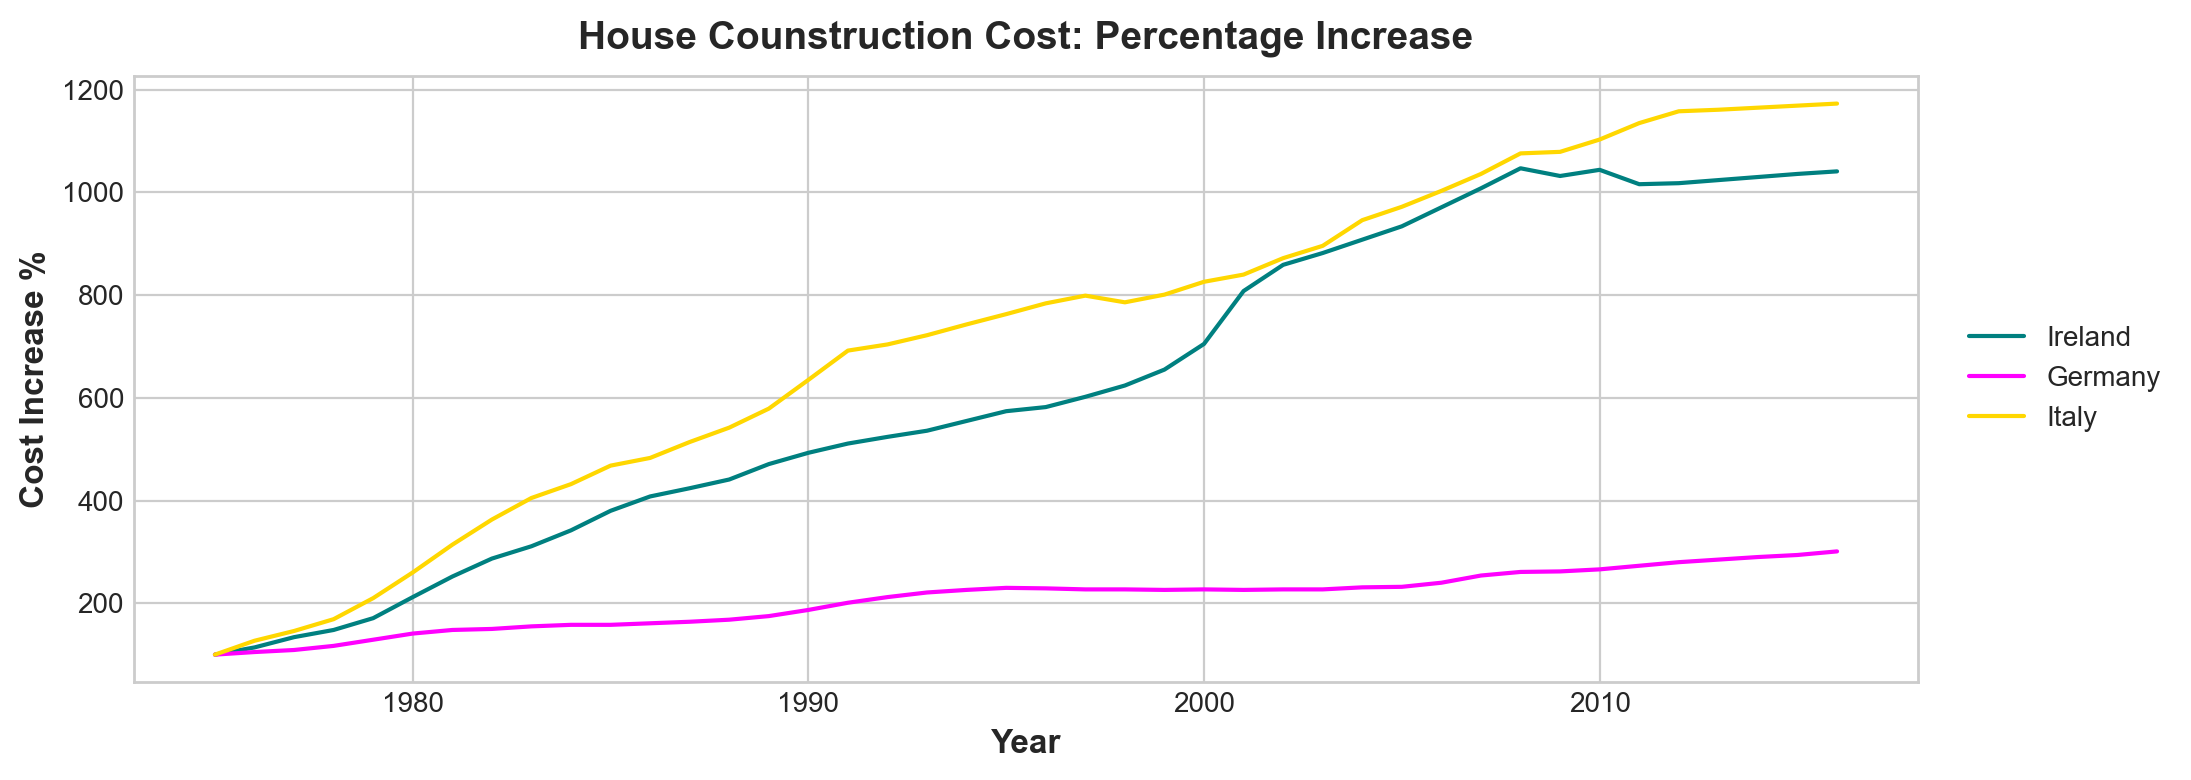

In [308]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Cost['Year'], df_All_Countries_Construction_Cost['Ireland_Construction_Cost'], label='Ireland', color='teal');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Cost['Year'], df_All_Countries_Construction_Cost['Germany_Construction_Cost'], label='Germany', color='magenta');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Cost['Year'], df_All_Countries_Construction_Cost['Italy_Construction_Cost'], label='Italy', color='gold');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Cost Increase %');  # Add a y-label to the axes.
ax.set_title("House Counstruction Cost: Percentage Increase");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend


In [309]:
import plotly.express as px

fig = px.scatter_geo(df_All_Countries_Construction_Cost_Geo, 
                    locations="Country_Code",
 # name of column indicating country-codes
                    size="Construction_Cost", 
 # name of column by which to size the bubble
                    hover_name="Country", 
# name of column to be displayed while hovering over the map
                    size_max=30, # parameter to scale all bubble size
                    scope='europe',
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'House Construction Cost',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

.

## Total Construction

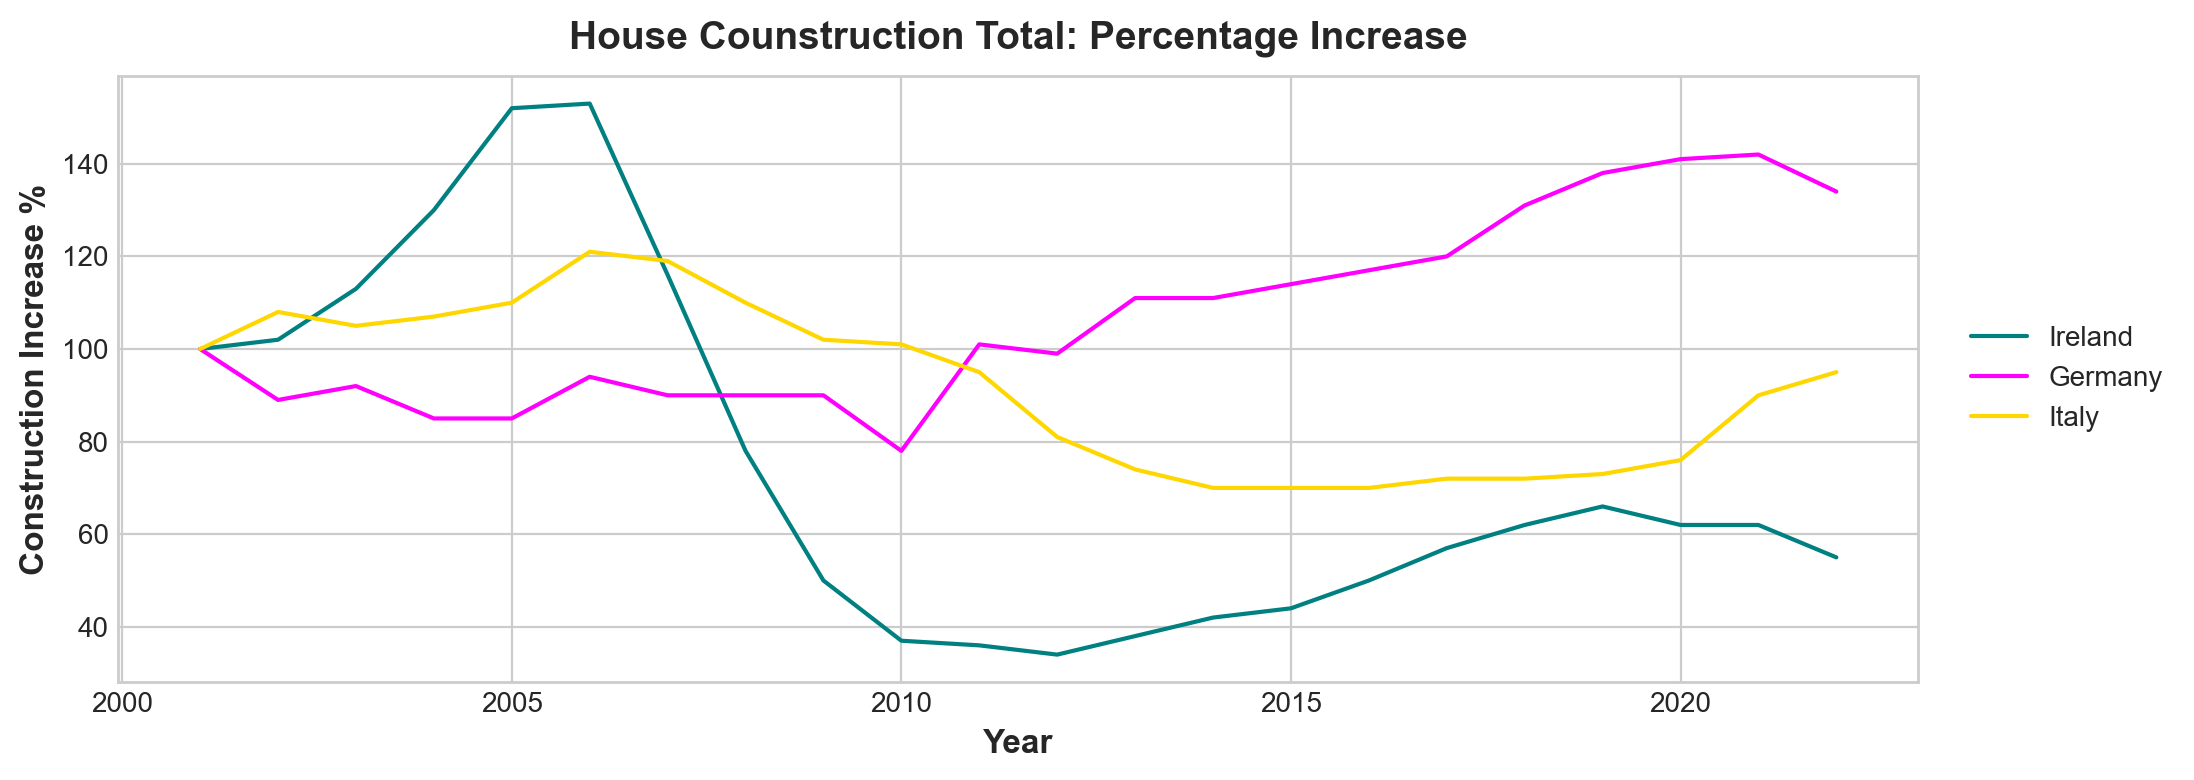

In [155]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Total['Year'], df_All_Countries_Construction_Total['Ireland_Construction_Total'], label='Ireland', color='teal');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Total['Year'], df_All_Countries_Construction_Total['Germany_Construction_Total'], label='Germany', color='magenta');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Total['Year'], df_All_Countries_Construction_Total['Italy_Construction_Total'], label='Italy', color='gold');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Construction Increase %');  # Add a y-label to the axes.
ax.set_title("House Counstruction Total: Percentage Increase");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

In [157]:
import plotly.express as px

fig = px.scatter_geo(df_All_Countries_Construction_Total_Geo, 
                    locations="Country_Code",
 # name of column indicating country-codes
                    size="Construction_Total", 
 # name of column by which to size the bubble
                    hover_name="Country", 
# name of column to be displayed while hovering over the map
                    size_max=30, # parameter to scale all bubble size
                    scope='europe',
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'House Construction Total',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

.

## Construction Employment

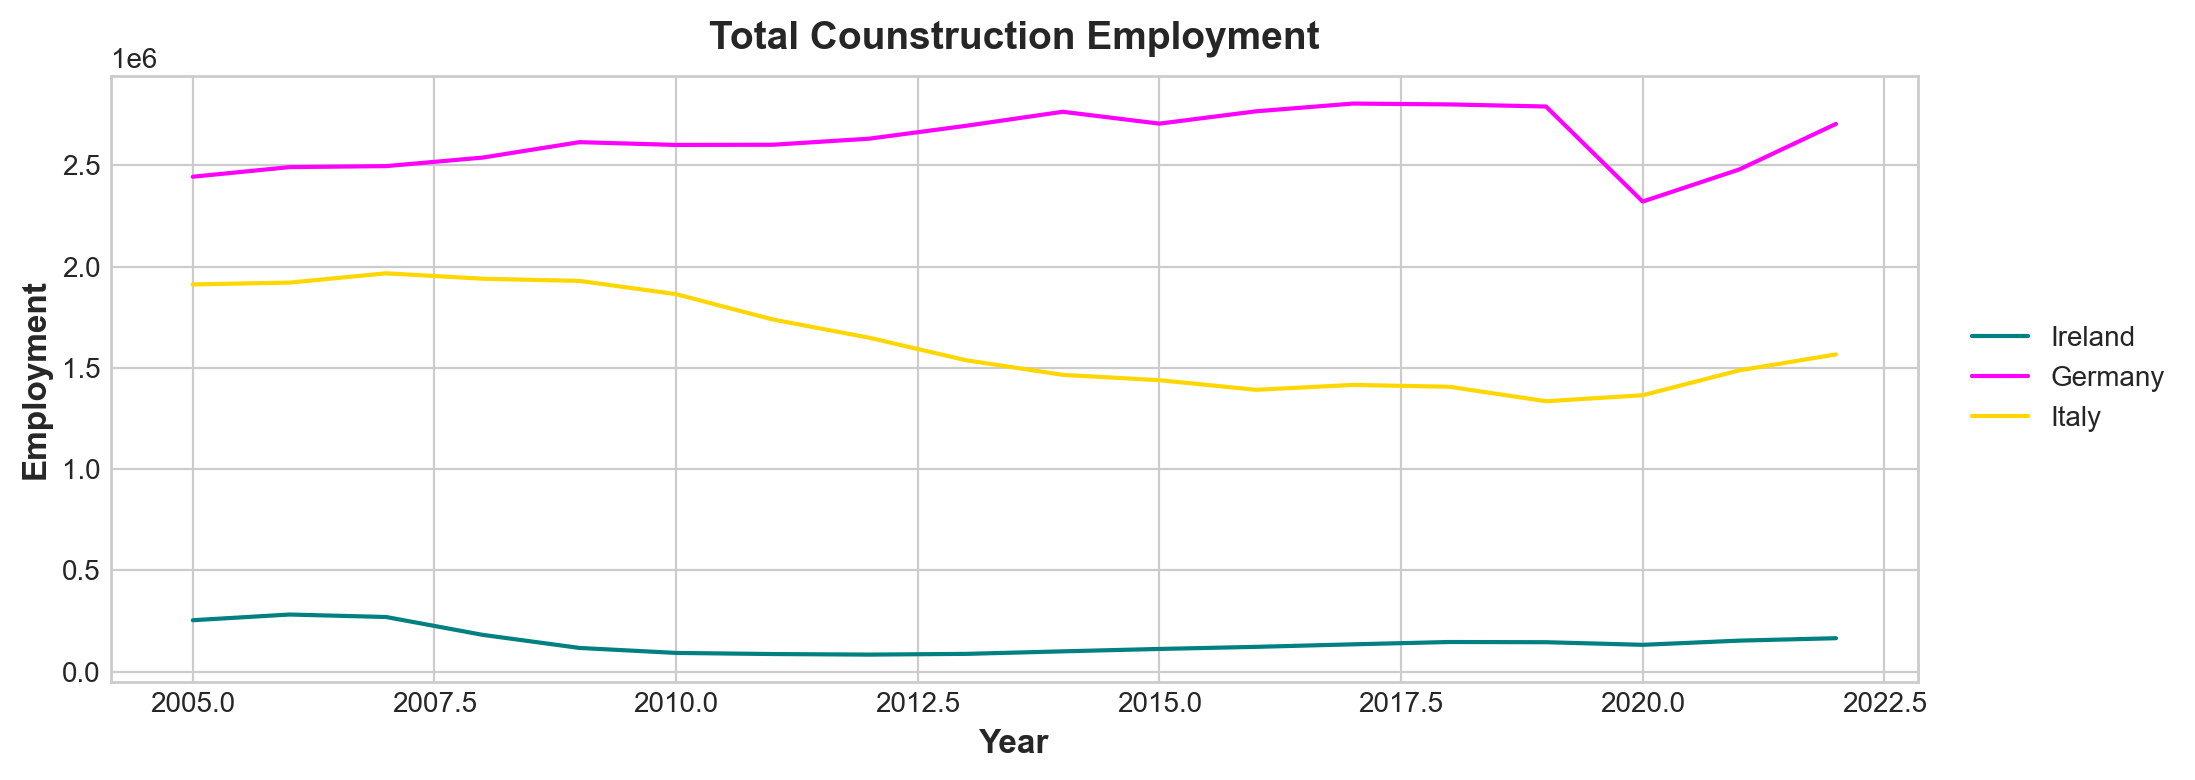

In [161]:
#PLOTTING GRAPH 

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Ireland_Construction_Employment'], label='Ireland', color='teal');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Germany_Construction_Employment'], label='Germany', color='magenta');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Italy_Construction_Employment'], label='Italy', color='gold');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Employment');  # Add a y-label to the axes.
ax.set_title("Total Counstruction Employment");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

In [162]:
import plotly.express as px

fig = px.scatter_geo(df_All_Countries_Construction_Employment_Geo, 
                    locations="Country_Code",
 # name of column indicating country-codes
                    size="Construction_Employment", 
 # name of column by which to size the bubble
                    hover_name="Country", 
# name of column to be displayed while hovering over the map
                    size_max=30, # parameter to scale all bubble size
                    scope='europe',
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Construction Employment',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

### Construction Employment per Total Population

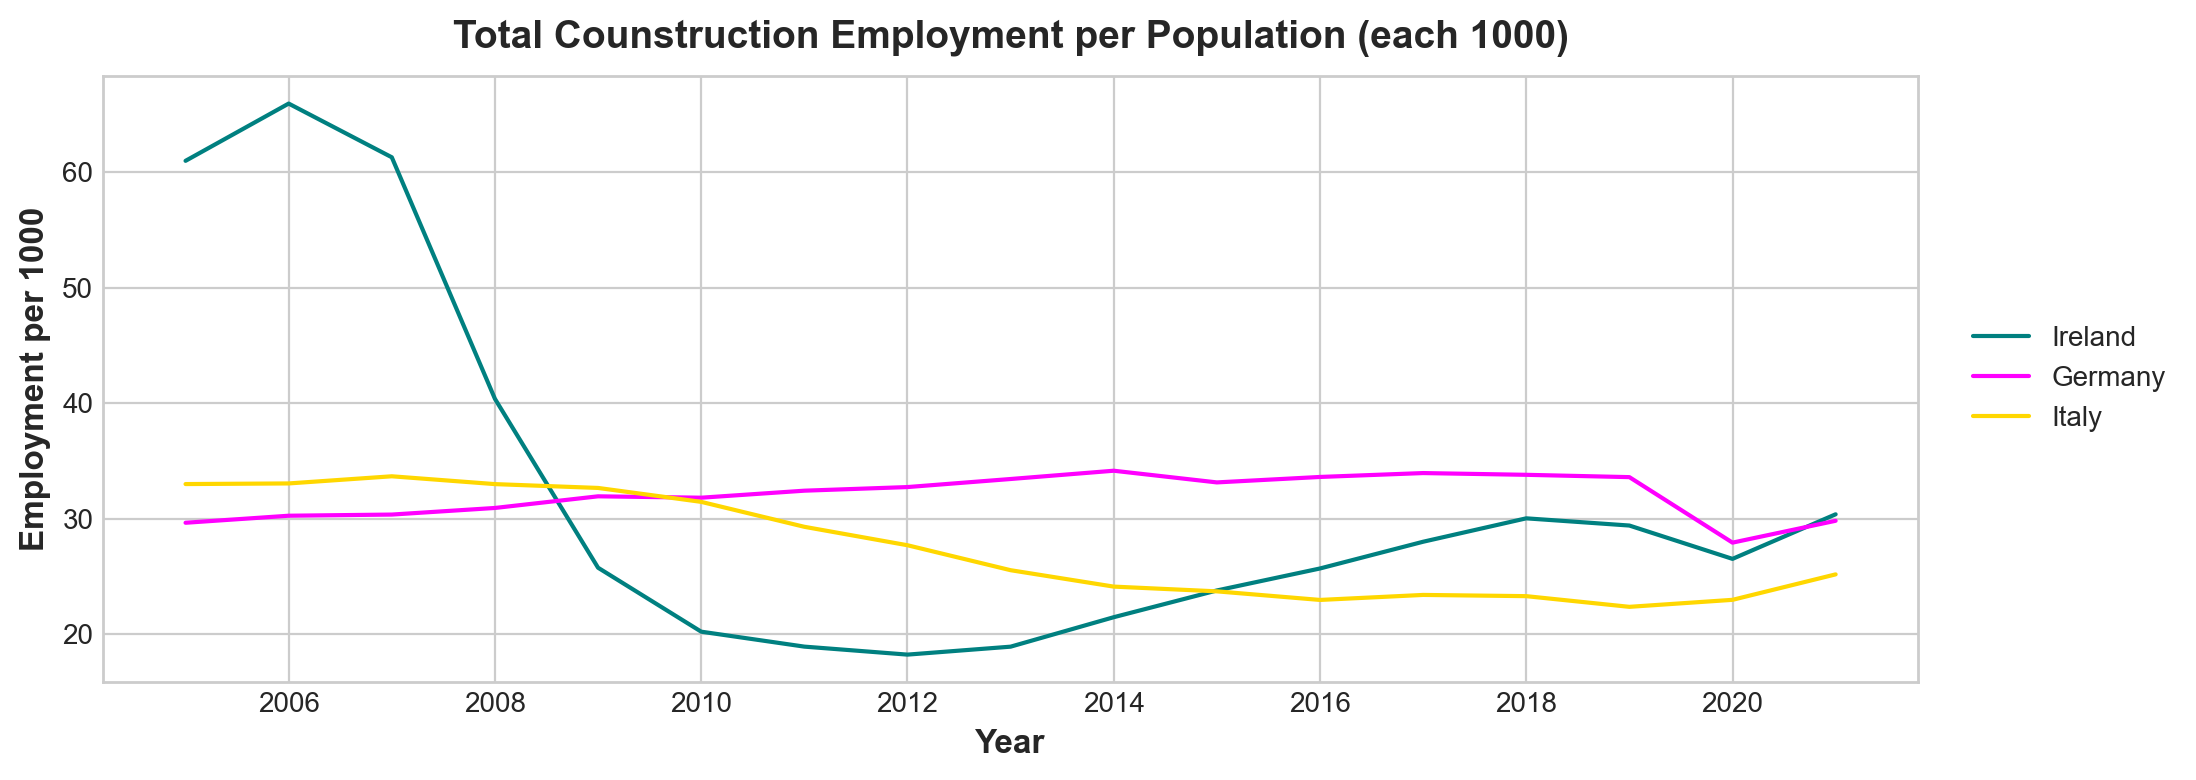

In [339]:
#Application of the per 1000 rate = Employment / Population * 1000
#RPO = E/P*1000

#Dropping rows from datasets to have the same dimension at the data intersection for the graph.
df_All_Countries_Construction_Employment_p = df_All_Countries_Construction_Employment.drop(df_All_Countries_Construction_Employment[df_All_Countries_Construction_Employment.Year >= 2022].index)
df_All_Countries_Construction_Total_p = df_All_Countries_Construction_Total_p.drop(df_All_Countries_Construction_Total_p[df_All_Countries_Construction_Total_p.Year < 2005].index)

#Dropping rows from datasets to have the same dimension at the data intersection for the graph.
df_All_Countries_Population_Total_p = df_All_Countries_Population_Total.drop(df_All_Countries_Population_Total[df_All_Countries_Population_Total.Year >= 2022].index)
df_All_Countries_Population_Total_p = df_All_Countries_Population_Total_p.drop(df_All_Countries_Population_Total_p[df_All_Countries_Population_Total_p.Year < 2005].index)

#Reseting the dataset index because the dropped rows
df_All_Countries_Construction_Employment_p.reset_index(drop=True, inplace=True) 
df_All_Countries_Population_Total_p.reset_index(drop=True, inplace=True) 

#PLOTTING GRAPH 

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Employment_p['Year'], df_All_Countries_Construction_Employment_p['Ireland_Construction_Employment'] / df_All_Countries_Population_Total_p['Ireland_Population_Total'] * 1000, label='Ireland', color='teal');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Employment_p['Year'], df_All_Countries_Construction_Employment_p['Germany_Construction_Employment'] / df_All_Countries_Population_Total_p['Germany_Population_Total'] * 1000, label='Germany', color='magenta');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Employment_p['Year'], df_All_Countries_Construction_Employment_p['Italy_Construction_Employment'] / df_All_Countries_Population_Total_p['Italy_Population_Total'] * 1000, label='Italy', color='gold');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Employment per 1000');  # Add a y-label to the axes.
ax.set_title("Total Counstruction Employment per Population (each 1000)");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

.

### Contruction Employment per Active Population 

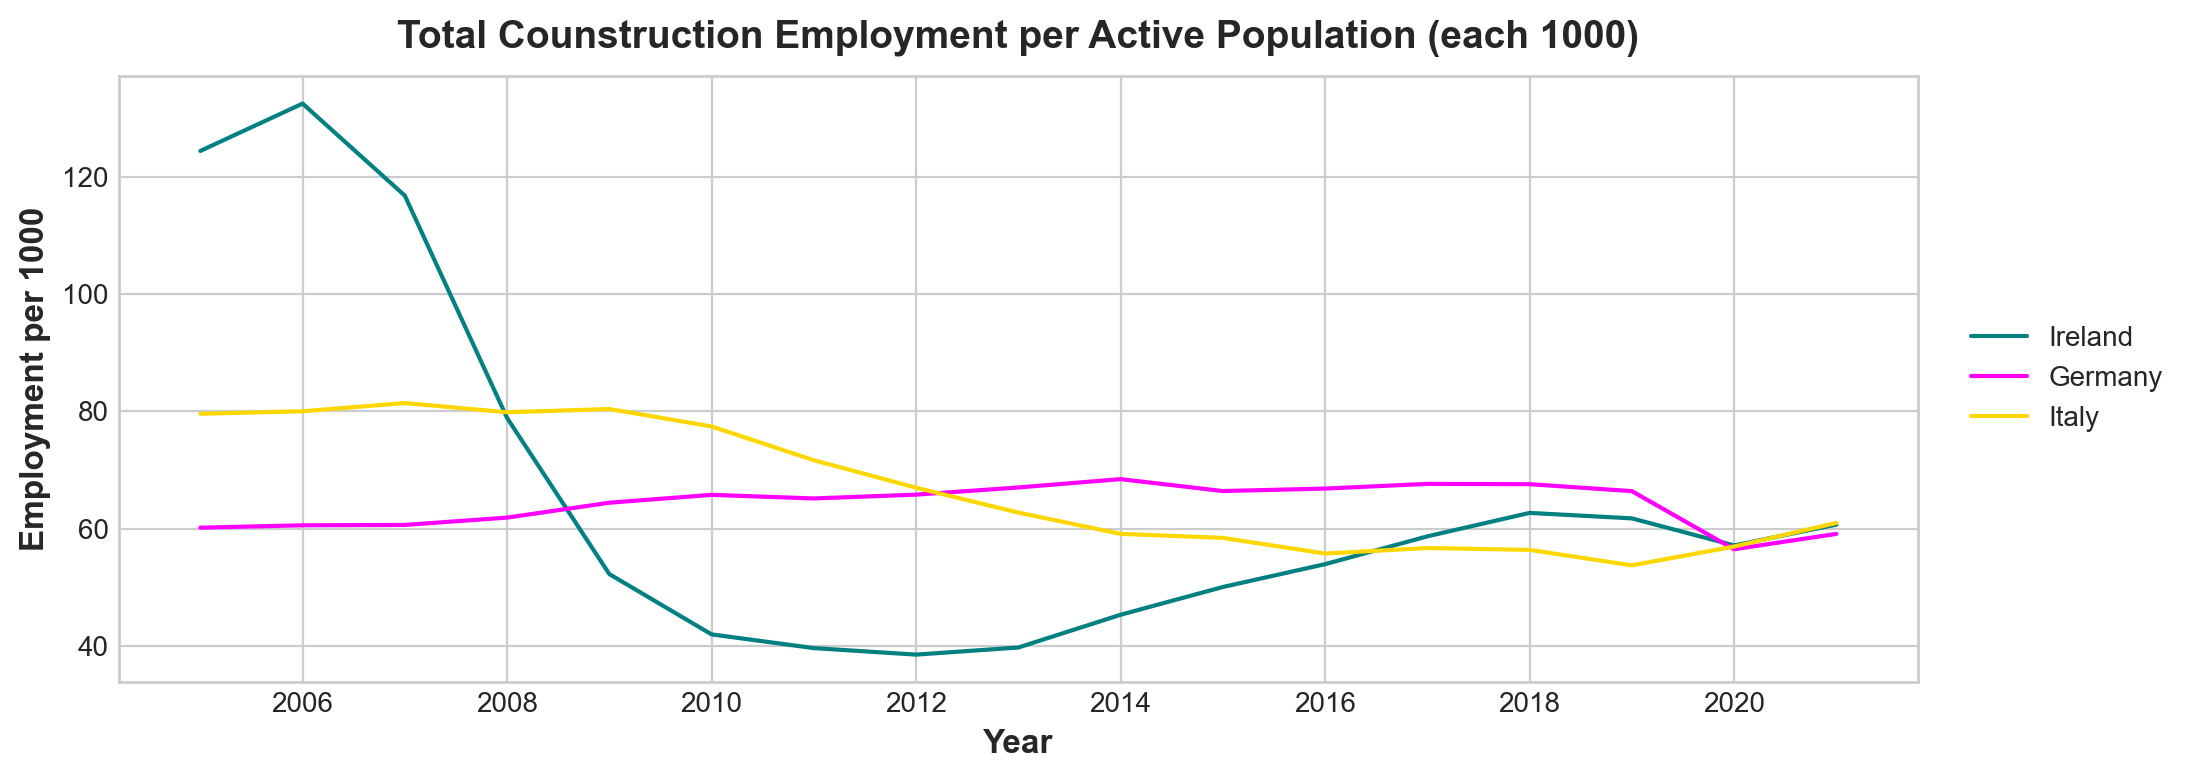

In [340]:
# For this graph it was calculated the RPO (Rate per occurances) 
# RPO = Employment / Active Population * 1000

#Dropping rows from datasets to have the same dimension at the data intersection for the graph.
df_All_Countries_Construction_Employment_p = df_All_Countries_Construction_Employment.drop(df_All_Countries_Construction_Employment[df_All_Countries_Construction_Employment.Year >= 2022].index)
df_All_Countries_Construction_Total_p = df_All_Countries_Construction_Total_p.drop(df_All_Countries_Construction_Total_p[df_All_Countries_Construction_Total_p.Year < 2005].index)

#Dropping rows from datasets to have the same dimension at the data intersection for the graph.
df_All_Countries_Population_Total_Active_p = df_All_Countries_Population_Total_Active.drop(df_All_Countries_Population_Total_Active[df_All_Countries_Population_Total_Active.Year >= 2022].index)
df_All_Countries_Population_Total_Active_p = df_All_Countries_Population_Total_Active_p.drop(df_All_Countries_Population_Total_Active_p[df_All_Countries_Population_Total_Active_p.Year < 2005].index)

#Reseting the dataset index because the dropped rows
df_All_Countries_Construction_Employment_p.reset_index(drop=True, inplace=True) 
df_All_Countries_Population_Total_Active_p.reset_index(drop=True, inplace=True) 


# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Employment['Year'], 
        df_All_Countries_Construction_Employment['Ireland_Construction_Employment'] / df_All_Countries_Population_Total_Active_p['Ireland_Population_Total_Active'] * 1000, 
        label='Ireland', color='teal');  

ax.plot(df_All_Countries_Construction_Employment['Year'], 
        df_All_Countries_Construction_Employment['Germany_Construction_Employment'] / df_All_Countries_Population_Total_Active_p['Germany_Population_Total_Active'] * 1000, 
        label='Germany', color='magenta');  

ax.plot(df_All_Countries_Construction_Employment['Year'], 
        df_All_Countries_Construction_Employment['Italy_Construction_Employment'] / df_All_Countries_Population_Total_Active_p['Italy_Population_Total_Active'] * 1000, 
        label='Italy', color='gold');  

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Employment per 1000');  # Add a y-label to the axes.
ax.set_title("Total Counstruction Employment per Active Population (each 1000)");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

# Statistical Analysis

# Machine Learning

## Linear Regression - Time-step Feature

## House Construction Cost

In [166]:
# HOUSE CONSTRUCTION COST
#df_All_Countries_Construction_Cost

# CONSTRUCTION TOTAL
#df_All_Countries_Construction_Total

# CONSTRUCTION EMPLOYMENT
#df_All_Countries_Construction_Employment

# POPULATION TOTAL
#df_All_Countries_Population_Total

#POPULATION TOTAL ACTIVE
#df_All_Countries_Population_Total_Active

In [167]:
#Preparation of the dataset to use Time-Step feature for all countries (Ireland, Italy and Germany)
df_Construction_Cost_Regression = df_All_Countries_Construction_Cost

#preparing the feature Year to be used to calculate the period, then we need to convert to a datetime value
df_Construction_Cost_Regression['Date'] = ''
for i, row in df_Construction_Cost_Regression.iterrows():
    df_Construction_Cost_Regression.at[i,'Date'] = pd.to_datetime(str(df_Construction_Cost_Regression.at[i,'Year']) + '-01' + '-01')


#Set date to be the index, this will help to plot the final graph
df_Construction_Cost_Regression = df_Construction_Cost_Regression.set_index("Date");
df_Construction_Cost_Regression = df_Construction_Cost_Regression.to_period();

#Provided the time series doesn't have any missing dates, we can create a time dummy by counting out the length of the series.
df_Construction_Cost_Regression['Time'] = np.arange(len(df_Construction_Cost_Regression.index));

### Ireland - Time-Step Feature - House Cost Construction

Ireland House Construction Cost in 2023: [1330.60829754]
Ireland House Construction Cost in 2024: [1356.29794992]
Ireland House Construction Cost in 2025: [1381.9876023]
Ireland House Construction Cost in 2026: [1407.67725468]
Ireland House Construction Cost in 2027: [1433.36690706]
Ireland House Construction Cost in 2028: [1459.05655944]
[25.68965238]
97.50498338870432


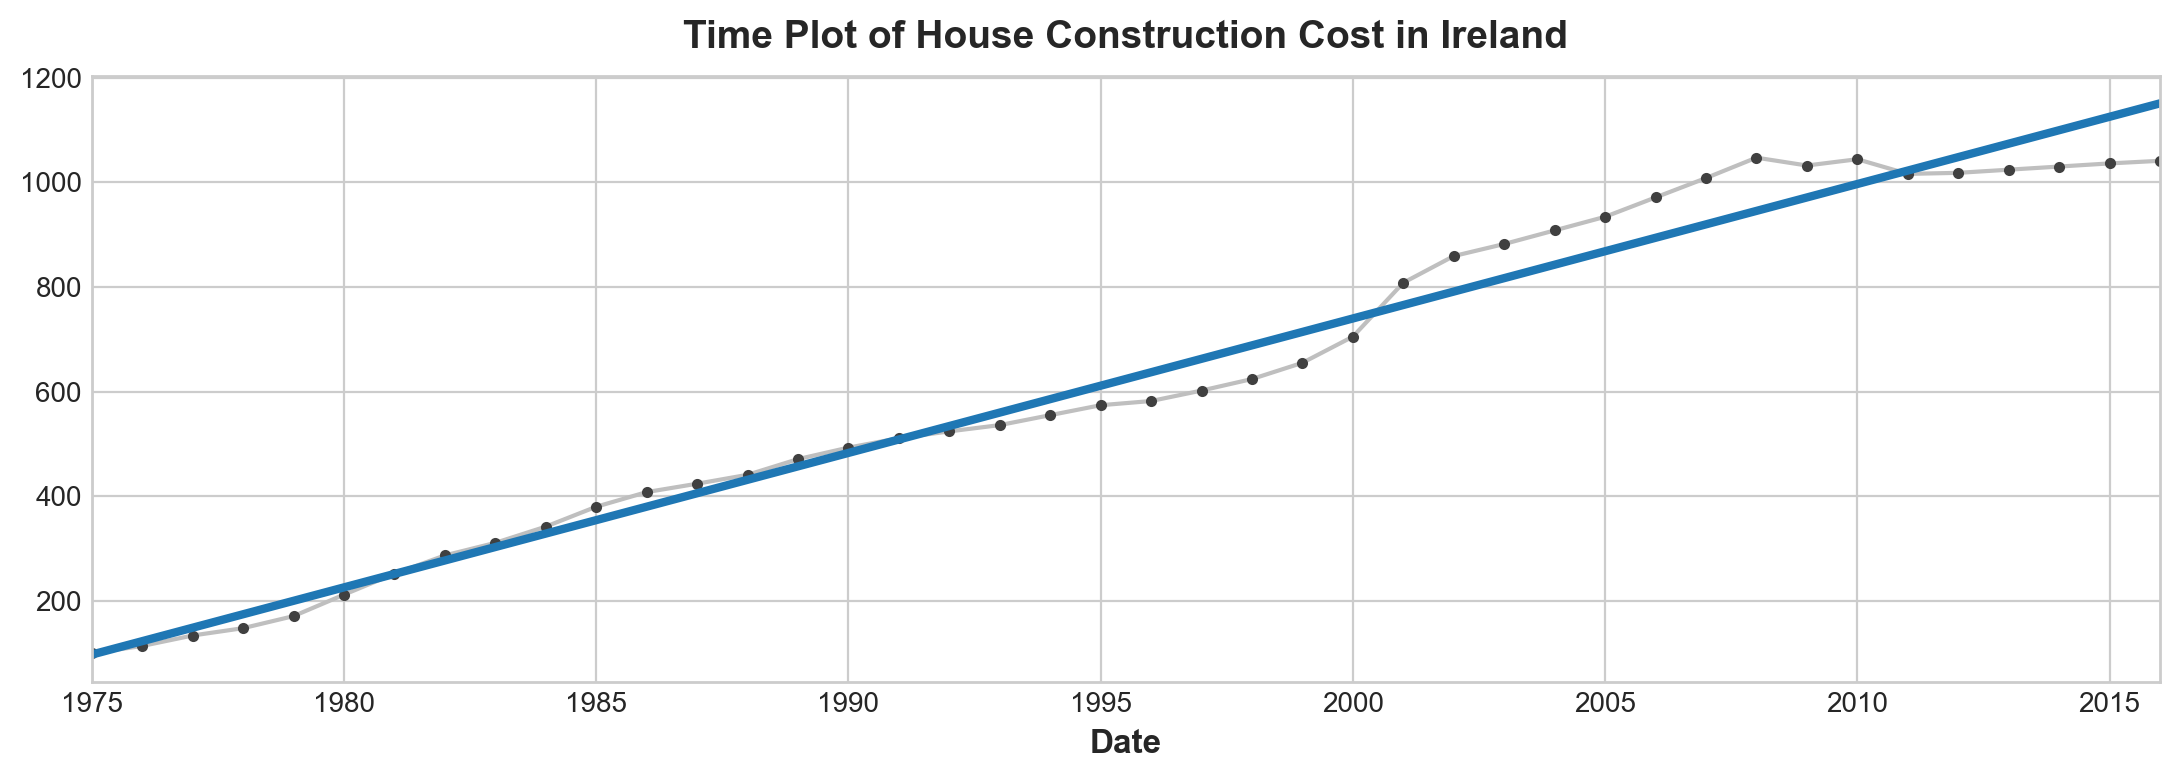

In [168]:

# Training data
XT = df_Construction_Cost_Regression.loc[:, ['Time']]; # features
yT = df_Construction_Cost_Regression.loc[:, 'Ireland_Construction_Cost'];  # target

# Train the model
modelT = LinearRegression();
modelT.fit(XT, yT);

# Store the fitted values as a time series with the same time index as
# the training data
y_predT = pd.Series(modelT.predict(XT), index = XT.index);

# Ploting the results in a graph to analyse
ax = yT.plot(**plot_params);
ax = y_predT.plot(ax = ax, linewidth = 3);
ax.set_title('Time Plot of House Construction Cost in Ireland');
# The graph shows the predictive line (in blue) vs the real data.

# How to predict in this case? We have 42 time series representing years from 1975 to 2016, 
# any number from 43 will predict new values for House Cost, for example:
# 42 = 2017
# 43 = 2018
# 46 = 2021
# 50 = 2025

print("Ireland House Construction Cost in 2023: " + str(modelT.predict([[48]])))
print("Ireland House Construction Cost in 2024: " + str(modelT.predict([[49]])))
print("Ireland House Construction Cost in 2025: " + str(modelT.predict([[50]])))
print("Ireland House Construction Cost in 2026: " + str(modelT.predict([[51]])))
print("Ireland House Construction Cost in 2027: " + str(modelT.predict([[52]])))
print("Ireland House Construction Cost in 2028: " + str(modelT.predict([[53]])))


print(modelT.coef_)
print(modelT.intercept_)
# 

### Germany - Time-Step Feature - House Cost Construction

Germany House Construction Cost in 2023: [329.99594846]
Germany House Construction Cost in 2024: [334.4633336]
Germany House Construction Cost in 2025: [338.93071874]
Germany House Construction Cost in 2026: [343.39810388]
Germany House Construction Cost in 2027: [347.86548902]
Germany House Construction Cost in 2028: [352.33287416]
[4.46738514]
115.56146179401992


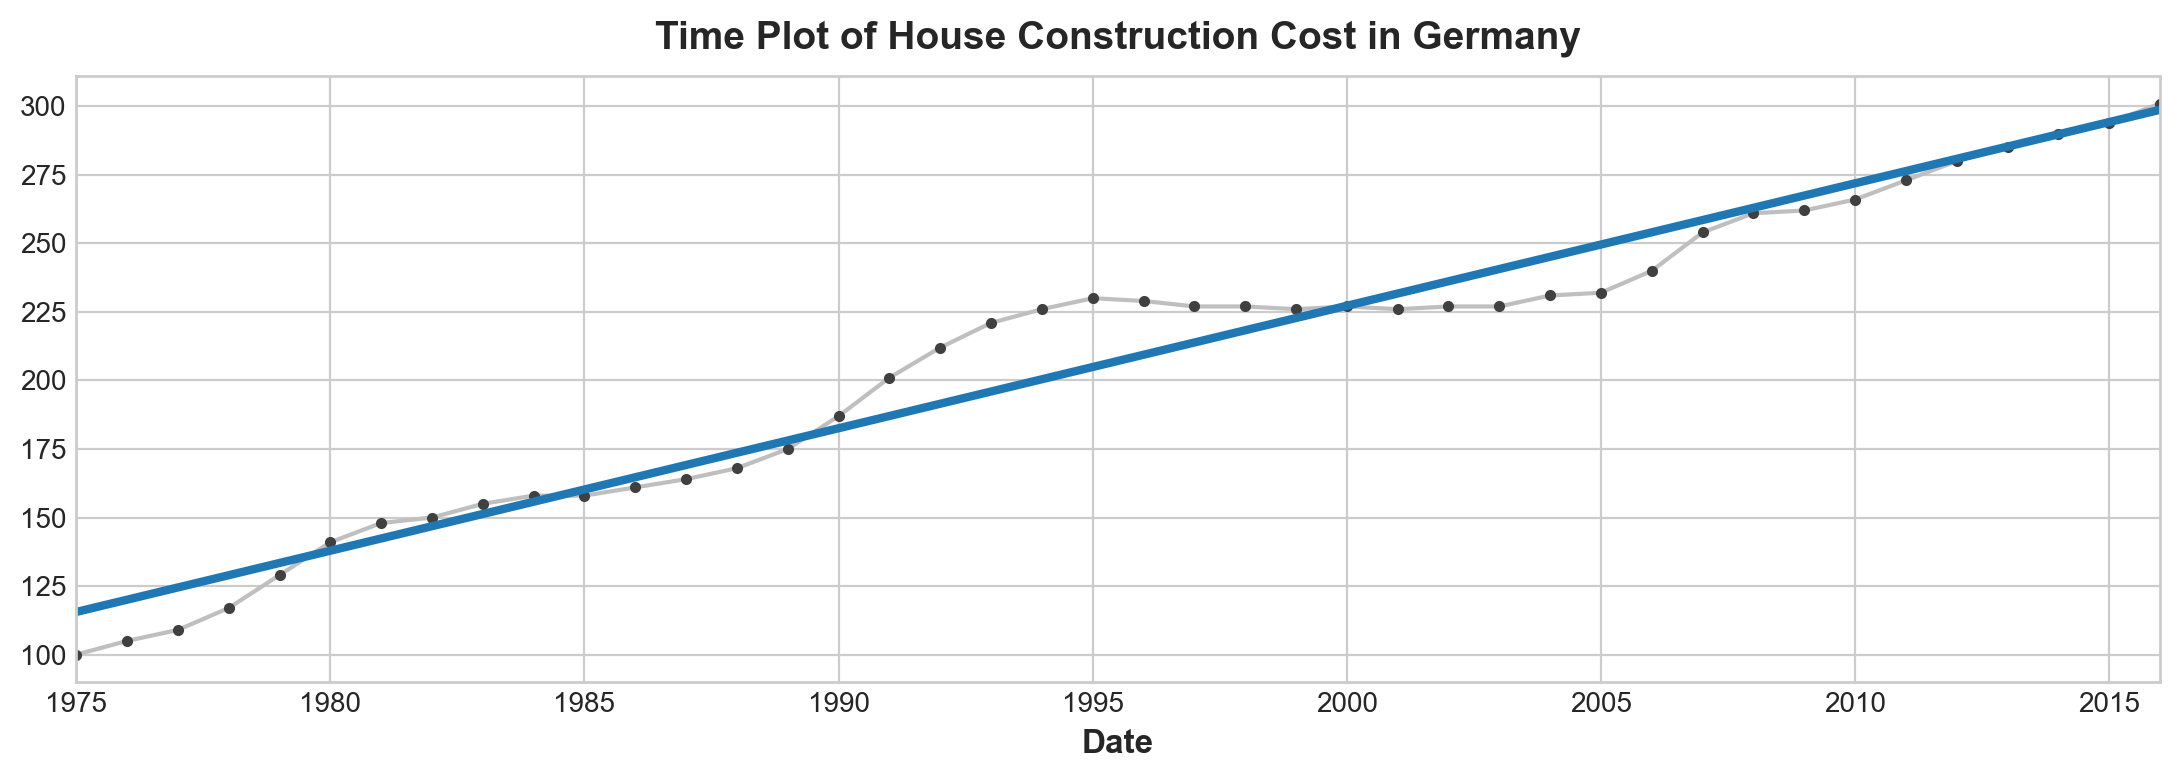

In [169]:

# Training data
XT = df_Construction_Cost_Regression.loc[:, ['Time']]; # features
yT = df_Construction_Cost_Regression.loc[:, 'Germany_Construction_Cost'];  # target

# Train the model
modelT = LinearRegression();
modelT.fit(XT, yT);

# Store the fitted values as a time series with the same time index as
# the training data
y_predT = pd.Series(modelT.predict(XT), index = XT.index);

# Ploting the results in a graph to analyse
ax = yT.plot(**plot_params);
ax = y_predT.plot(ax = ax, linewidth = 3);
ax.set_title('Time Plot of House Construction Cost in Germany');
# The graph shows the predictive line (in blue) vs the real data.

# How to predict in this case? We have 42 time series representing years from 1975 to 2016, 
# any number from 43 will predict new values for House Cost, for example:
# 42 = 2017
# 43 = 2018
# 46 = 2021
# 50 = 2025

print("Germany House Construction Cost in 2023: " + str(modelT.predict([[48]])))
print("Germany House Construction Cost in 2024: " + str(modelT.predict([[49]])))
print("Germany House Construction Cost in 2025: " + str(modelT.predict([[50]])))
print("Germany House Construction Cost in 2026: " + str(modelT.predict([[51]])))
print("Germany House Construction Cost in 2027: " + str(modelT.predict([[52]])))
print("Germany House Construction Cost in 2028: " + str(modelT.predict([[53]])))


print(modelT.coef_)
print(modelT.intercept_)
# 

### Italy - Time-Step Feature  - House Cost Construction

Italy House Construction Cost in 2023: [1453.19231289]
Italy House Construction Cost in 2024: [1479.93090781]
Italy House Construction Cost in 2025: [1506.66950274]
Italy House Construction Cost in 2026: [1533.40809767]
Italy House Construction Cost in 2027: [1560.1466926]
Italy House Construction Cost in 2028: [1586.88528752]
[26.73859493]
169.7397563676634


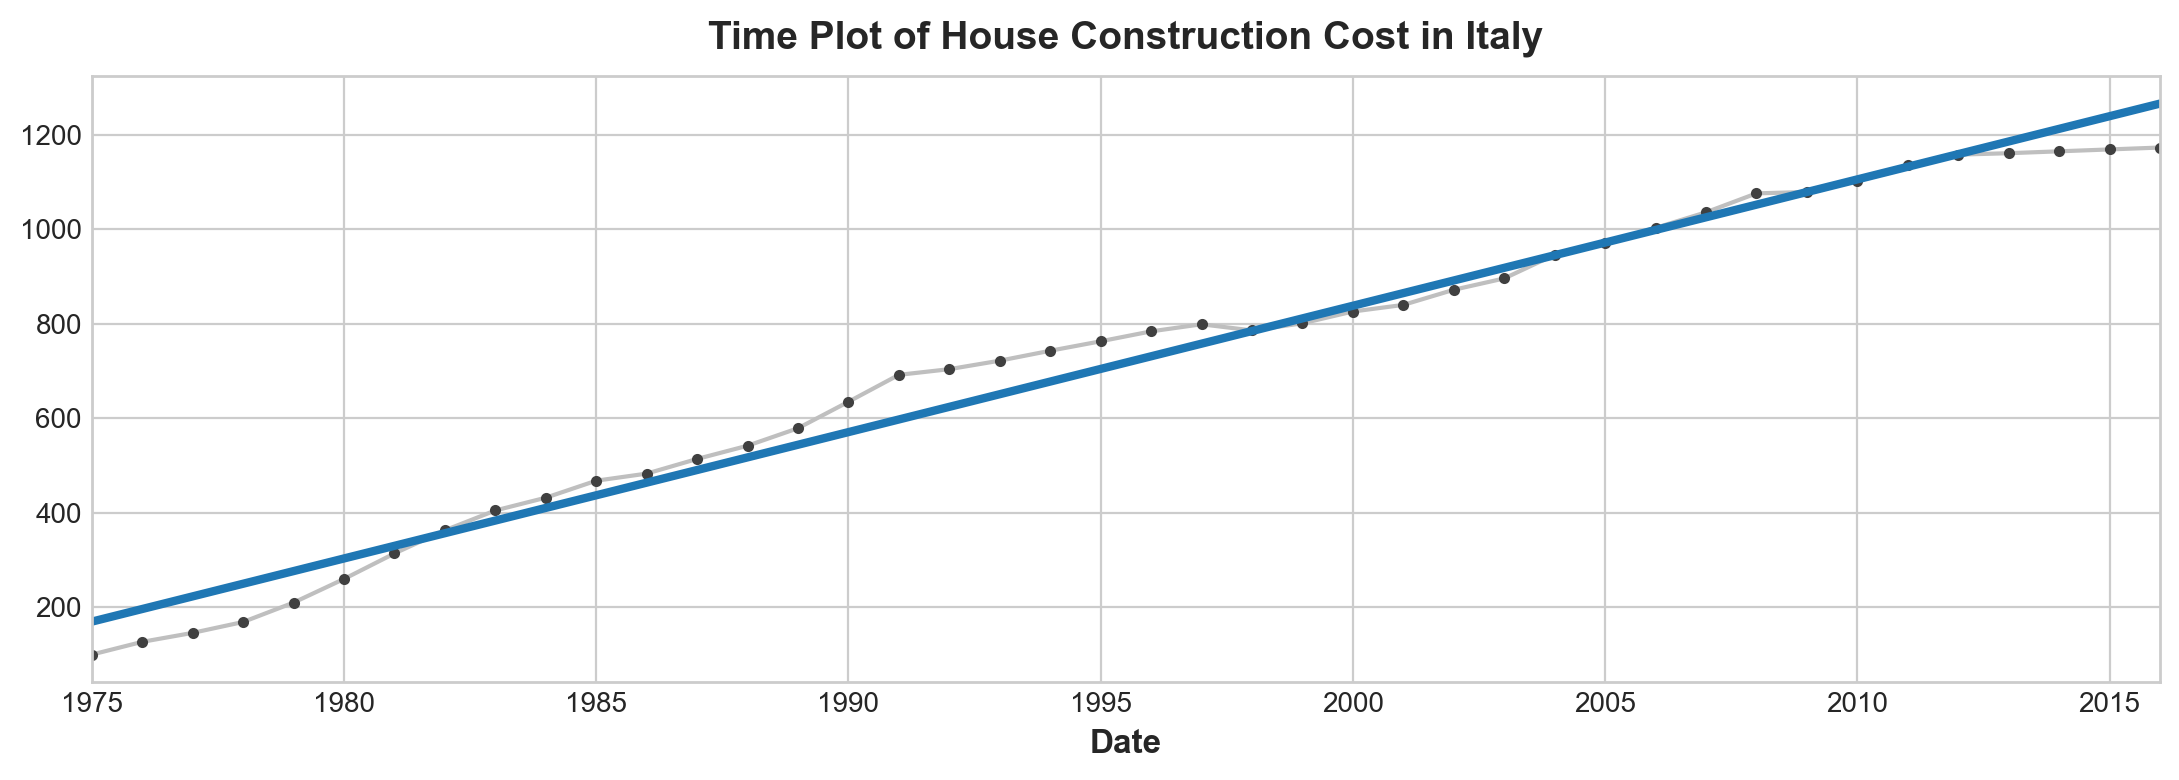

In [170]:
# Training data
XT = df_Construction_Cost_Regression.loc[:, ['Time']]; # features
yT = df_Construction_Cost_Regression.loc[:, 'Italy_Construction_Cost'];  # target

# Train the model
modelT = LinearRegression();
modelT.fit(XT, yT);

# Store the fitted values as a time series with the same time index as
# the training data
y_predT = pd.Series(modelT.predict(XT), index = XT.index);

# Ploting the results in a graph to analyse
ax = yT.plot(**plot_params);
ax = y_predT.plot(ax = ax, linewidth = 3);
ax.set_title('Time Plot of House Construction Cost in Italy');
# The graph shows the predictive line (in blue) vs the real data.

# How to predict in this case? We have 42 time series representing years from 1975 to 2016, 
# any number from 43 will predict new values for House Cost, for example:
# 42 = 2017
# 43 = 2018
# 46 = 2021
# 50 = 2025

print("Italy House Construction Cost in 2023: " + str(modelT.predict([[48]])))
print("Italy House Construction Cost in 2024: " + str(modelT.predict([[49]])))
print("Italy House Construction Cost in 2025: " + str(modelT.predict([[50]])))
print("Italy House Construction Cost in 2026: " + str(modelT.predict([[51]])))
print("Italy House Construction Cost in 2027: " + str(modelT.predict([[52]])))
print("Italy House Construction Cost in 2028: " + str(modelT.predict([[53]])))


print(modelT.coef_)
print(modelT.intercept_)
# 

## Linear Regression - Time-Lag Feature

## House Construction Cost

### Ireland - Time-Lag Feature

[0.98501237]
32.153257529703865


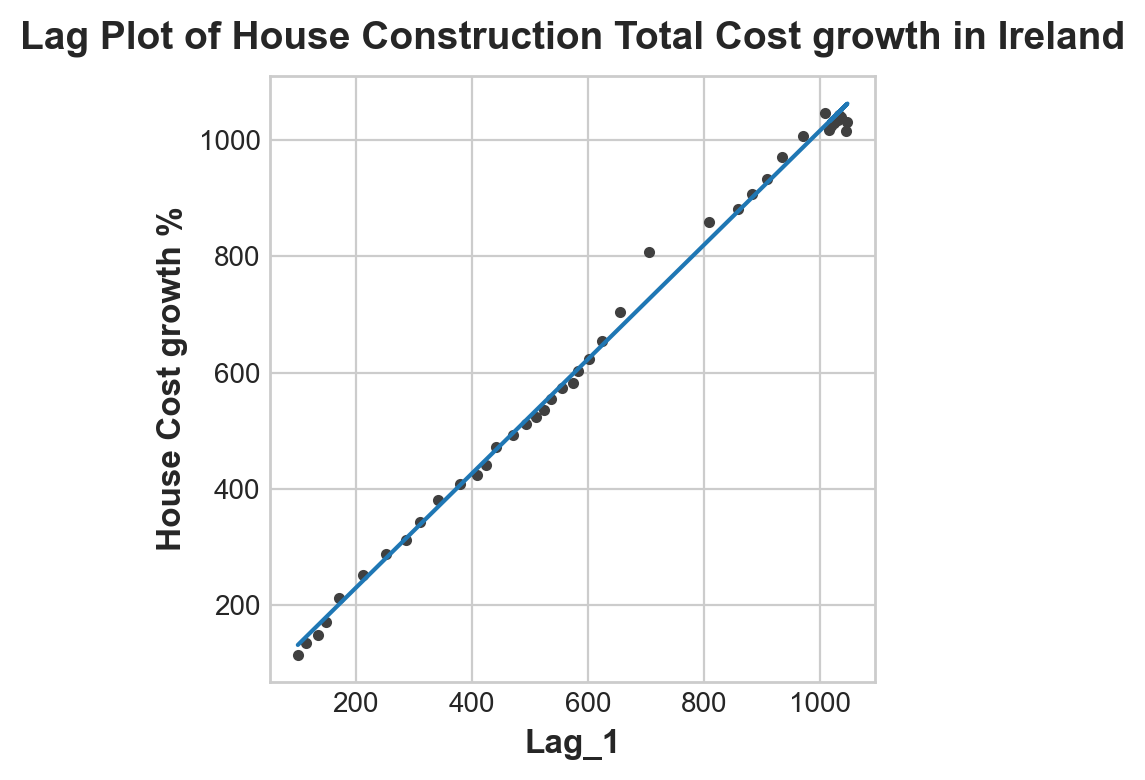

In [171]:
df_Time_Lag_Ireland = df_Construction_Cost_Regression

#Set date to be the index, this will help to plot the final graph
df_Time_Lag_Ireland = df_Time_Lag_Ireland.set_index("Year")

#Lag feature
#Pandas provides us a simple method to lag a series, the shift method.
df_Time_Lag_Ireland['Lag_1'] = df_Time_Lag_Ireland['Ireland_Construction_Cost'].shift(1)

# Training data
X = df_Time_Lag_Ireland.loc[:, ['Lag_1']]
X.dropna(inplace = True)  # drop missing values in the feature set

y = df_Time_Lag_Ireland.loc[:, 'Ireland_Construction_Cost']  # create the target
y, X = y.align(X, join = 'inner')  # drop corresponding values in target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index = X.index)

aTotal = df_Time_Lag_Ireland.iloc[1: , :]

# Ploting the results in a graph
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('House Cost growth %')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of House Construction Total Cost growth in Ireland');

print(model.coef_)
print(model.intercept_)


### Germany - Time-Lag Feature

[0.98551267]
7.8702208809921785


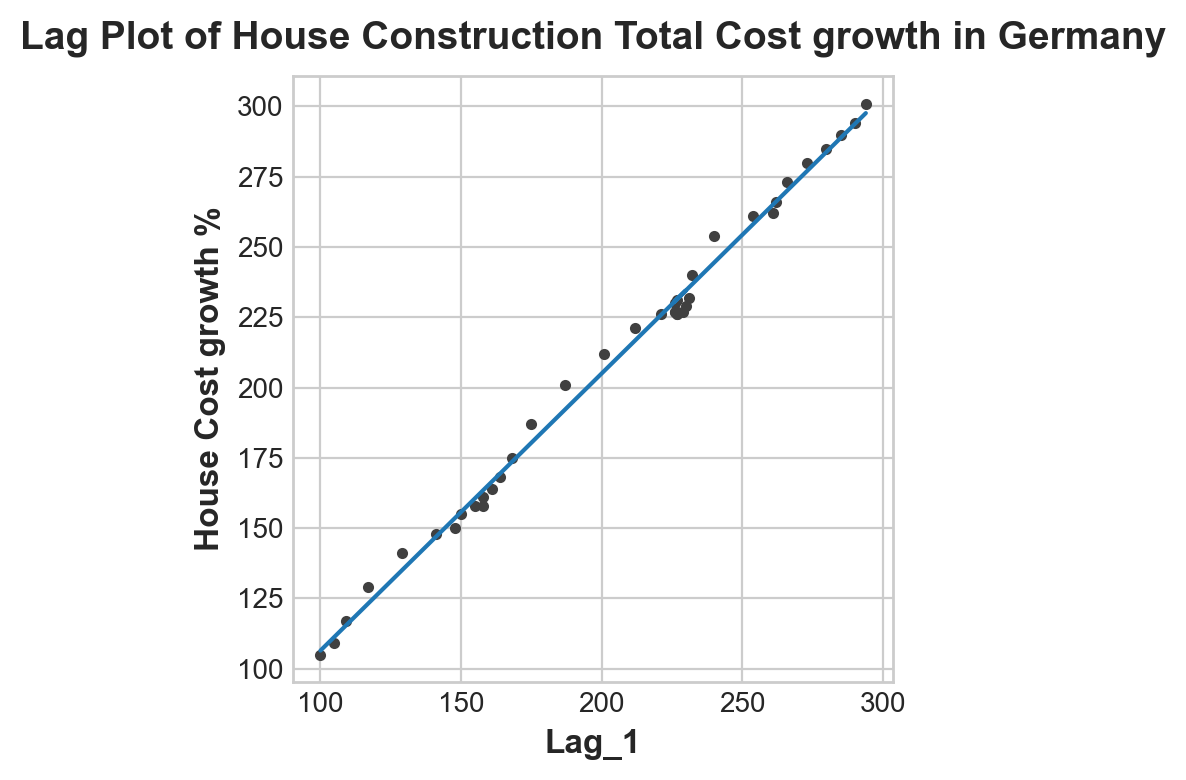

In [172]:
df_Time_Germany = df_Construction_Cost_Regression

#Set date to be the index, this will help to plot the final graph
df_Time_Germany = df_Time_Germany.set_index("Year")

#Lag feature
#Pandas provides us a simple method to lag a series, the shift method.
df_Time_Germany['Lag_1'] = df_Time_Germany['Germany_Construction_Cost'].shift(1)

# Training data
X = df_Time_Germany.loc[:, ['Lag_1']]
X.dropna(inplace = True)  # drop missing values in the feature set

y = df_Time_Germany.loc[:, 'Germany_Construction_Cost']  # create the target
y, X = y.align(X, join = 'inner')  # drop corresponding values in target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index = X.index)

aTotal = df_Time_Germany.iloc[1: , :]

# Ploting the results in a graph
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('House Cost growth %')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of House Construction Total Cost growth in Germany');

print(model.coef_)
print(model.intercept_)


### Italy - Time-Lag Feature

[0.97793322]
41.767100688916


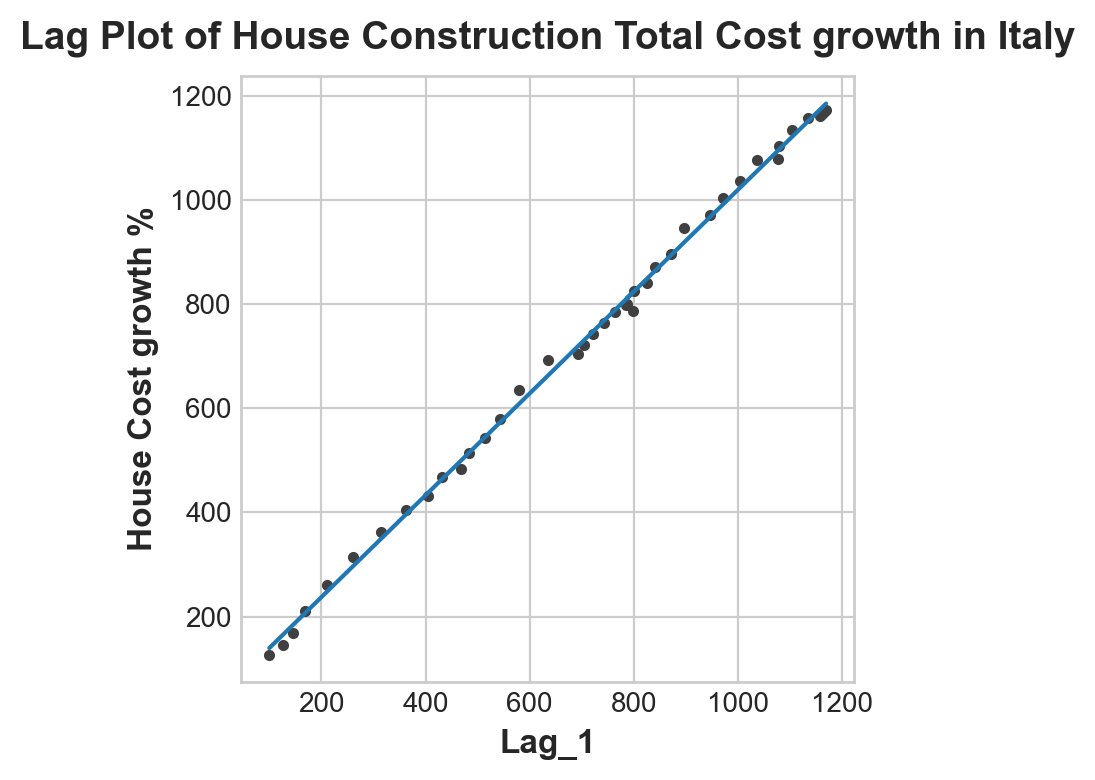

In [173]:
df_Time_Italy = df_Construction_Cost_Regression

#Set date to be the index, this will help to plot the final graph
df_Time_Italy = df_Time_Italy.set_index("Year")

#Lag feature
#Pandas provides us a simple method to lag a series, the shift method.
df_Time_Italy['Lag_1'] = df_Time_Italy['Italy_Construction_Cost'].shift(1)

# Training data
X = df_Time_Italy.loc[:, ['Lag_1']]
X.dropna(inplace = True)  # drop missing values in the feature set

y = df_Time_Italy.loc[:, 'Italy_Construction_Cost']  # create the target
y, X = y.align(X, join = 'inner')  # drop corresponding values in target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index = X.index)

aTotal = df_Time_Italy.iloc[1: , :]

# Ploting the results in a graph
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('House Cost growth %')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of House Construction Total Cost growth in Italy');

print(model.coef_)
print(model.intercept_)


## Linear Regression - Multi Featured

## House Construction Cost

In [174]:
#df_All_Countries_Construction_Total = 2001 - 2022
#df_All_Countries_Construction_Employmentt = 2005 - 2022
#df_All_Countries_Population_Total_Active: 2005 - 2022

#Remove rows below 2005 to have the same amount of data
for i, row in df_All_Countries_Construction_Total.iterrows():
    if int(df_All_Countries_Construction_Total.at[i,'Year']) < 2005:
        df_All_Countries_Construction_Total.drop(i, inplace = True)

#merge both datasets
df_merge = pd.merge(df_All_Countries_Construction_Cost, df_All_Countries_Construction_Employment, how='inner')
df_merge = pd.merge(df_merge, df_All_Countries_Population_Total_Active, how='inner')


### Ireland - House Cost Construction Prediction

In [175]:
# Create X and y objects
X = df_merge[['Year', 'Ireland_Construction_Employment', 'Ireland_Population_Total_Active']]
y = df_merge['Ireland_Construction_Cost']

#Fit model
regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict Total Construction, based on Year, Construction Employment and Total Active Population:
print("Year: 2025")
print("Construction Employment: 200 thousand")
print("Population Active: 3 million")
print("Prediction Construction Total:" + str(regr.predict([[2025, 200000, 3000000]])))


print("\nYear: 2025")
print("Construction Employment: 100 thousand")
print("Population Active: 2 million")
print("Prediction Construction Cost:" + str(regr.predict([[2025, 100000, 2000000]])))

print('\nIntercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Year: 2025
Construction Employment: 200 thousand
Population Active: 3 million
Prediction Construction Total:[1247.55439768]

Year: 2025
Construction Employment: 100 thousand
Population Active: 2 million
Prediction Construction Cost:[959.17814442]

Intercept:  1236.2735884619165
Coefficients:  [-4.34568043e-01 -2.61523363e-04  3.14528590e-04]


### Germany -  House Cost Construction Prediction

In [176]:
# Create X and y objects
X = df_merge[['Year', 'Germany_Construction_Employment', 'Germany_Population_Total_Active']]
y = df_merge['Germany_Construction_Cost']

#Fit model
regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict Total Construction, based on Year, Construction Employment and Total Active Population:
print("Year: 2025")
print("Construction Employment: 4 million")
print("Population Active: 50 million")
print("Prediction Construction Cost:" + str(regr.predict([[2025, 4000000, 50000000]])))


print("\nYear: 2025")
print("Construction Employment: 6 million")
print("Population Active: 80 million")
print("Prediction Construction Cost:" + str(regr.predict([[2025, 6000000, 80000000]])))

print('\nIntercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)




Year: 2025
Construction Employment: 4 million
Population Active: 50 million
Prediction Construction Cost:[362.39734846]

Year: 2025
Construction Employment: 6 million
Population Active: 80 million
Prediction Construction Cost:[383.11819486]

Intercept:  -11437.544242189613
Coefficients:  [5.80929577e+00 2.37437727e-06 5.32403062e-07]


### Italy -  House Cost Construction Prediction

In [177]:
# Create X and y objects
X = df_merge[['Year', 'Italy_Construction_Employment', 'Italy_Population_Total_Active']]
y = df_merge['Italy_Construction_Cost']

#Fit model
regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict Total Construction, based on Year, Construction Employment and Total Active Population:
print("Year: 2025")
print("Construction Employment: 2 million")
print("Population Active: 30 million")
print("Prediction Construction Cost:" + str(regr.predict([[2025, 2000000, 30000000]])))


print("\nYear: 2025")
print("Construction Employment: 3 million")
print("Population Active: 40 million")
print("Prediction Construction Cost:" + str(regr.predict([[2025, 3000000, 40000000]])))

print('\nIntercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Year: 2025
Construction Employment: 2 million
Population Active: 30 million
Prediction Construction Cost:[1628.8350167]

Year: 2025
Construction Employment: 3 million
Population Active: 40 million
Prediction Construction Cost:[1950.91666621]

Intercept:  -54289.43275541267
Coefficients:  [2.72212495e+01 1.71007314e-04 1.51074335e-05]


.

## Machine Learning - Cross Validation

### Germany Construction Total

In [495]:
#Loading the dataset
df_Germany_Population_Total_ML = pd.read_csv("Germany_Population_Total_POPTOTDEA647NWDB.csv");

# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Population_Total_ML.iterrows():
    # Creating Year and Month columns based on DATE column
    df_Germany_Population_Total_ML.at[i,'Year'] = df_Germany_Population_Total_ML.at[i,'DATE'][0:4]
    
#Removing the uselles columns from our datset
df_Germany_Population_Total_ML = df_Germany_Population_Total_ML.drop('DATE', axis=1)

#Rename Column as a main value
df_Germany_Population_Total_ML = df_Germany_Population_Total_ML.rename({'POPTOTDEA647NWDB': 'Germany_Population_Total'}, axis=1)
 
# Reset Index to equalize after the drops
df_Germany_Population_Total_ML.reset_index(drop=True, inplace=True)

# Add last year population
df_Germany_Population_Total_ML.loc[len(df_Germany_Population_Total_ML)] = {'Germany_Population_Total': 84149353, 'Year': 2022}
df_Germany_Population_Total_ML.loc[len(df_Germany_Population_Total_ML)] = {'Germany_Population_Total': 84514634, 'Year': 2023}

#Convert Year to Int type
df_Germany_Population_Total_ML['Year'] = df_Germany_Population_Total_ML['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Population_Total_ML['Germany_Population_Total'] = round(df_Germany_Population_Total_ML['Germany_Population_Total'], 0).astype(float);




In [455]:
df_Germany_Population_Total_ML

,Germany_Population_Total,Year
0,72814900.0,1960
1,73377632.0,1961
2,74025784.0,1962
3,74714353.0,1963
4,75318337.0,1964
...,...,...
59,83092962.0,2019
60,83160871.0,2020
61,83196078.0,2021
62,84149353.0,2022


In [496]:
#Loading the dataset
df_Germany_Construction_Total_ML = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv")

df_Germany_Construction_Total_ML['Germany_Population_Total'] = 0

# Once Germany has a different format dataset, It need to be edited to have the same format.
# The column Year should be created and the different rows by Year should be removed
for i, row in df_Germany_Construction_Total_ML.iterrows():
    # Creating Year column based on DATE column
    Year = df_Germany_Construction_Total_ML.at[i,'DATE'][0:4]
    df_Germany_Construction_Total_ML.at[i,'Year'] = Year   
    Population = df_Germany_Population_Total_ML[df_Germany_Population_Total_ML['Year'] == int(Year)]['Germany_Population_Total']
    #print(Population.values[0])
    df_Germany_Construction_Total_ML.at[i,'Germany_Population_Total'] = Population.values[0]

#Removing the uselles collumns from our datset
df_Germany_Construction_Total_ML = df_Germany_Construction_Total_ML.drop('DATE', axis=1)

#Rename Colloumn as a main value
df_Germany_Construction_Total_ML = df_Germany_Construction_Total_ML.rename({'DEUPROCONMISMEI': 'Germany_Construction_Total'}, axis=1)

# Since we have datasets with different indexes, for example, in one the index refers to the year 2005, 
    # in another one it refers to the year 1991, to keep them all in the same pattern, we will recalculate them all 
    # so that the value of index be the first record, starting at 100. 
# it will be necessary to go through the dataset and recalculate all the other lines.

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)
for i, row in df_Germany_Construction_Total_ML.iterrows():
    if int(row['Year']) == 1962: 
        #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Germany_Construction_Total'])
        df_Germany_Construction_Total_ML.at[i,'Germany_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 2001 = 100
        newValue = float(row['Germany_Construction_Total']) * 100 / firstValue
        df_Germany_Construction_Total_ML.at[i,'Germany_Construction_Total'] = newValue

# Reset Index to equalize after the drops
df_Germany_Construction_Total_ML.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Construction_Total_ML['Year'] = df_Germany_Construction_Total_ML['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Total_ML['Germany_Construction_Total'] = round(df_Germany_Construction_Total_ML['Germany_Construction_Total'], 0).astype(float);

In [501]:
df_Germany_Construction_Total_ML

,Germany_Construction_Total,Germany_Population_Total,Year
0,100.0,74025784,1962
1,100.0,74025784,1962
2,100.0,74025784,1962
3,100.0,74025784,1962
4,100.0,74025784,1962
...,...,...,...
728,191.0,84149353,2022
729,198.0,84149353,2022
730,198.0,84149353,2022
731,179.0,84149353,2022


In [457]:
# print the entire dataframe
pd.set_option('display.max_rows', 10)
df_Germany_Construction_Total_ML

,Germany_Construction_Total,Germany_Population_Total,Year
0,100.0,74025784,1962
1,100.0,74025784,1962
2,100.0,74025784,1962
3,100.0,74025784,1962
4,100.0,74025784,1962
...,...,...,...
728,191.0,84149353,2022
729,198.0,84149353,2022
730,198.0,84149353,2022
731,179.0,84149353,2022


In [458]:
# recaling the variables (both)
df_columns = df_Germany_Construction_Total_ML.columns
scaler = MinMaxScaler()
df_Germany_Construction_Total_ML = scaler.fit_transform(df_Germany_Construction_Total_ML)

# rename columns (since now its an np array)
df_Germany_Construction_Total_ML = pd.DataFrame(df_Germany_Construction_Total_ML)
df_Germany_Construction_Total_ML.columns = df_columns

In [459]:
df_Germany_Construction_Total_ML

,Germany_Construction_Total,Germany_Population_Total,Year
0,0.126050,0.000000,0.000000
1,0.126050,0.000000,0.000000
2,0.126050,0.000000,0.000000
3,0.126050,0.000000,0.000000
4,0.126050,0.000000,0.000000
...,...,...,...
728,0.890756,0.965174,0.983607
729,0.949580,0.965174,0.983607
730,0.949580,0.965174,0.983607
731,0.789916,0.965174,0.983607


<AxesSubplot:xlabel='Year', ylabel='Germany_Construction_Total'>

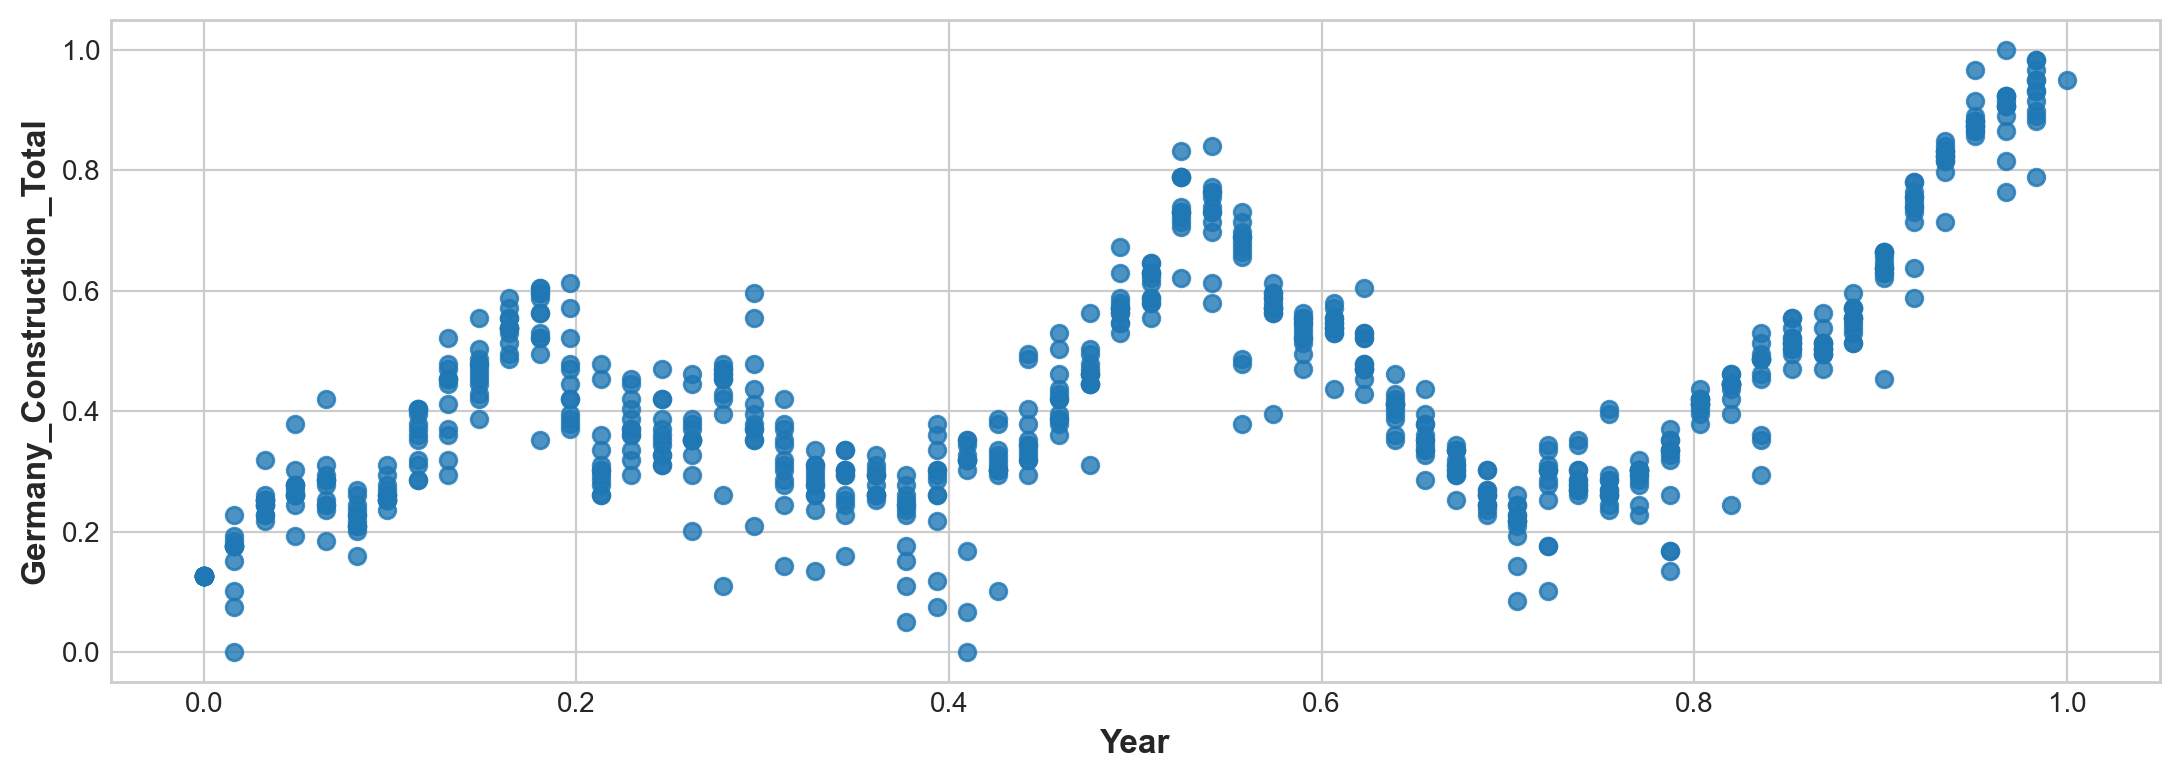

In [460]:
# visualise area-price relationship
sns.regplot(x="Year", y="Germany_Construction_Total", data=df_Germany_Construction_Total_ML, fit_reg=False)

In [461]:
# split into train and test
df_train, df_test = train_test_split(df_Germany_Construction_Total_ML, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

513
220


In [462]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['Year']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['Germany_Construction_Total']

X_test = df_test['Year']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['Germany_Construction_Total']

In [463]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

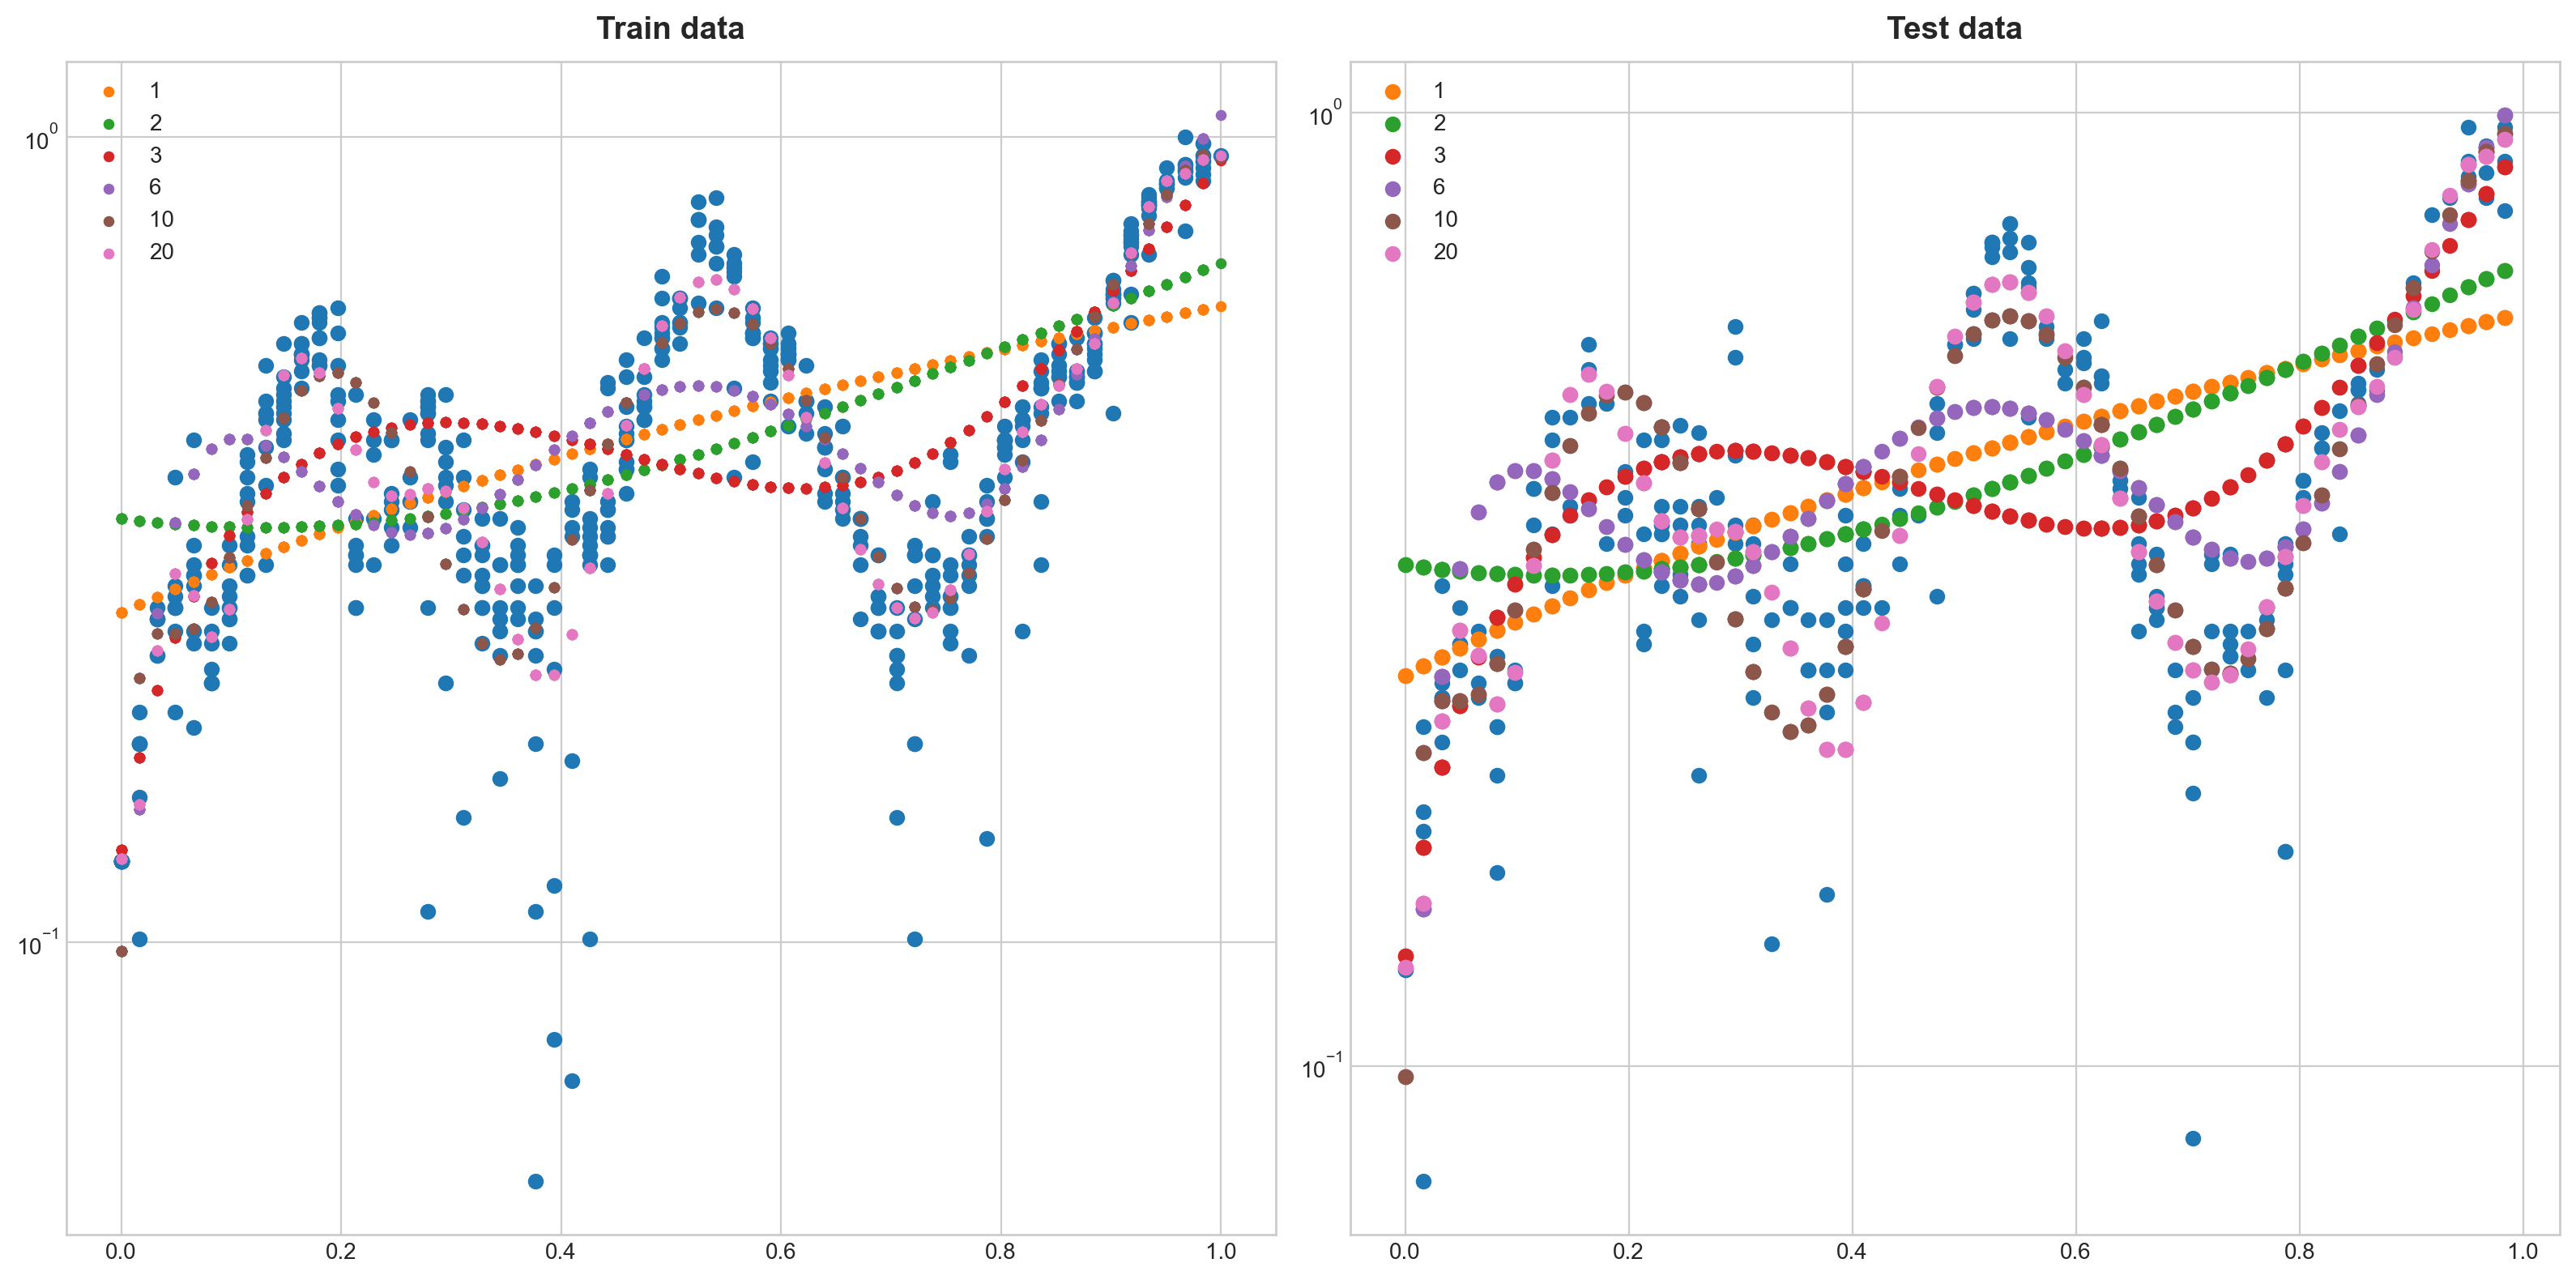

In [464]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [465]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.29, test score=0.22
Polynomial degree 2: train score=0.32, test score=0.23
Polynomial degree 3: train score=0.51, test score=0.39
Polynomial degree 6: train score=0.68, test score=0.63
Polynomial degree 10: train score=0.86, test score=0.82
Polynomial degree 20: train score=0.9, test score=0.87


### K-FOLD CV

In [466]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 

array([0.29419424, 0.32252625, 0.15088692, 0.29796726, 0.31531335])

In [467]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.3922384 , 0.30819685, 0.27827102, 0.28680365, 0.06118135])

In [468]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.02924444, -0.02539682, -0.02619367, -0.02695659, -0.03028925])

.

## Machine Learning - GridSearchCV

### Construction - All Countries

In [469]:
df_Germany_Construction_Total_ML

,Germany_Construction_Total,Germany_Population_Total,Year
0,0.126050,0.000000,0.000000
1,0.126050,0.000000,0.000000
2,0.126050,0.000000,0.000000
3,0.126050,0.000000,0.000000
4,0.126050,0.000000,0.000000
...,...,...,...
728,0.890756,0.965174,0.983607
729,0.949580,0.965174,0.983607
730,0.949580,0.965174,0.983607
731,0.789916,0.965174,0.983607


In [497]:
# split into X and y
X = df_Germany_Construction_Total_ML.loc[:, ['Germany_Population_Total', 'Year']]
y = df_Germany_Construction_Total_ML['Germany_Construction_Total']


# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [498]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [499]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002404,0.000494,0.001200,0.000400,2,{'n_features_to_select': 2},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
1,0.002217,0.000397,0.001831,0.000358,3,{'n_features_to_select': 3},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
2,0.002135,0.001175,0.001245,0.000752,4,{'n_features_to_select': 4},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
3,0.001538,0.001296,0.000808,0.000757,5,{'n_features_to_select': 5},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
4,0.006259,0.007666,0.000000,0.000000,6,{'n_features_to_select': 6},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.003112,0.000475,0.001523,0.000486,35,{'n_features_to_select': 35},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
34,0.003601,0.005819,0.000400,0.000800,36,{'n_features_to_select': 36},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
35,0.004187,0.006078,0.000000,0.000000,37,{'n_features_to_select': 37},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348
36,0.002126,0.003229,0.002365,0.003083,38,{'n_features_to_select': 38},0.315044,0.185421,0.311426,0.406654,...,0.315212,0.0735,1,0.34572,0.369499,0.343552,0.328149,0.342254,0.345835,0.013348


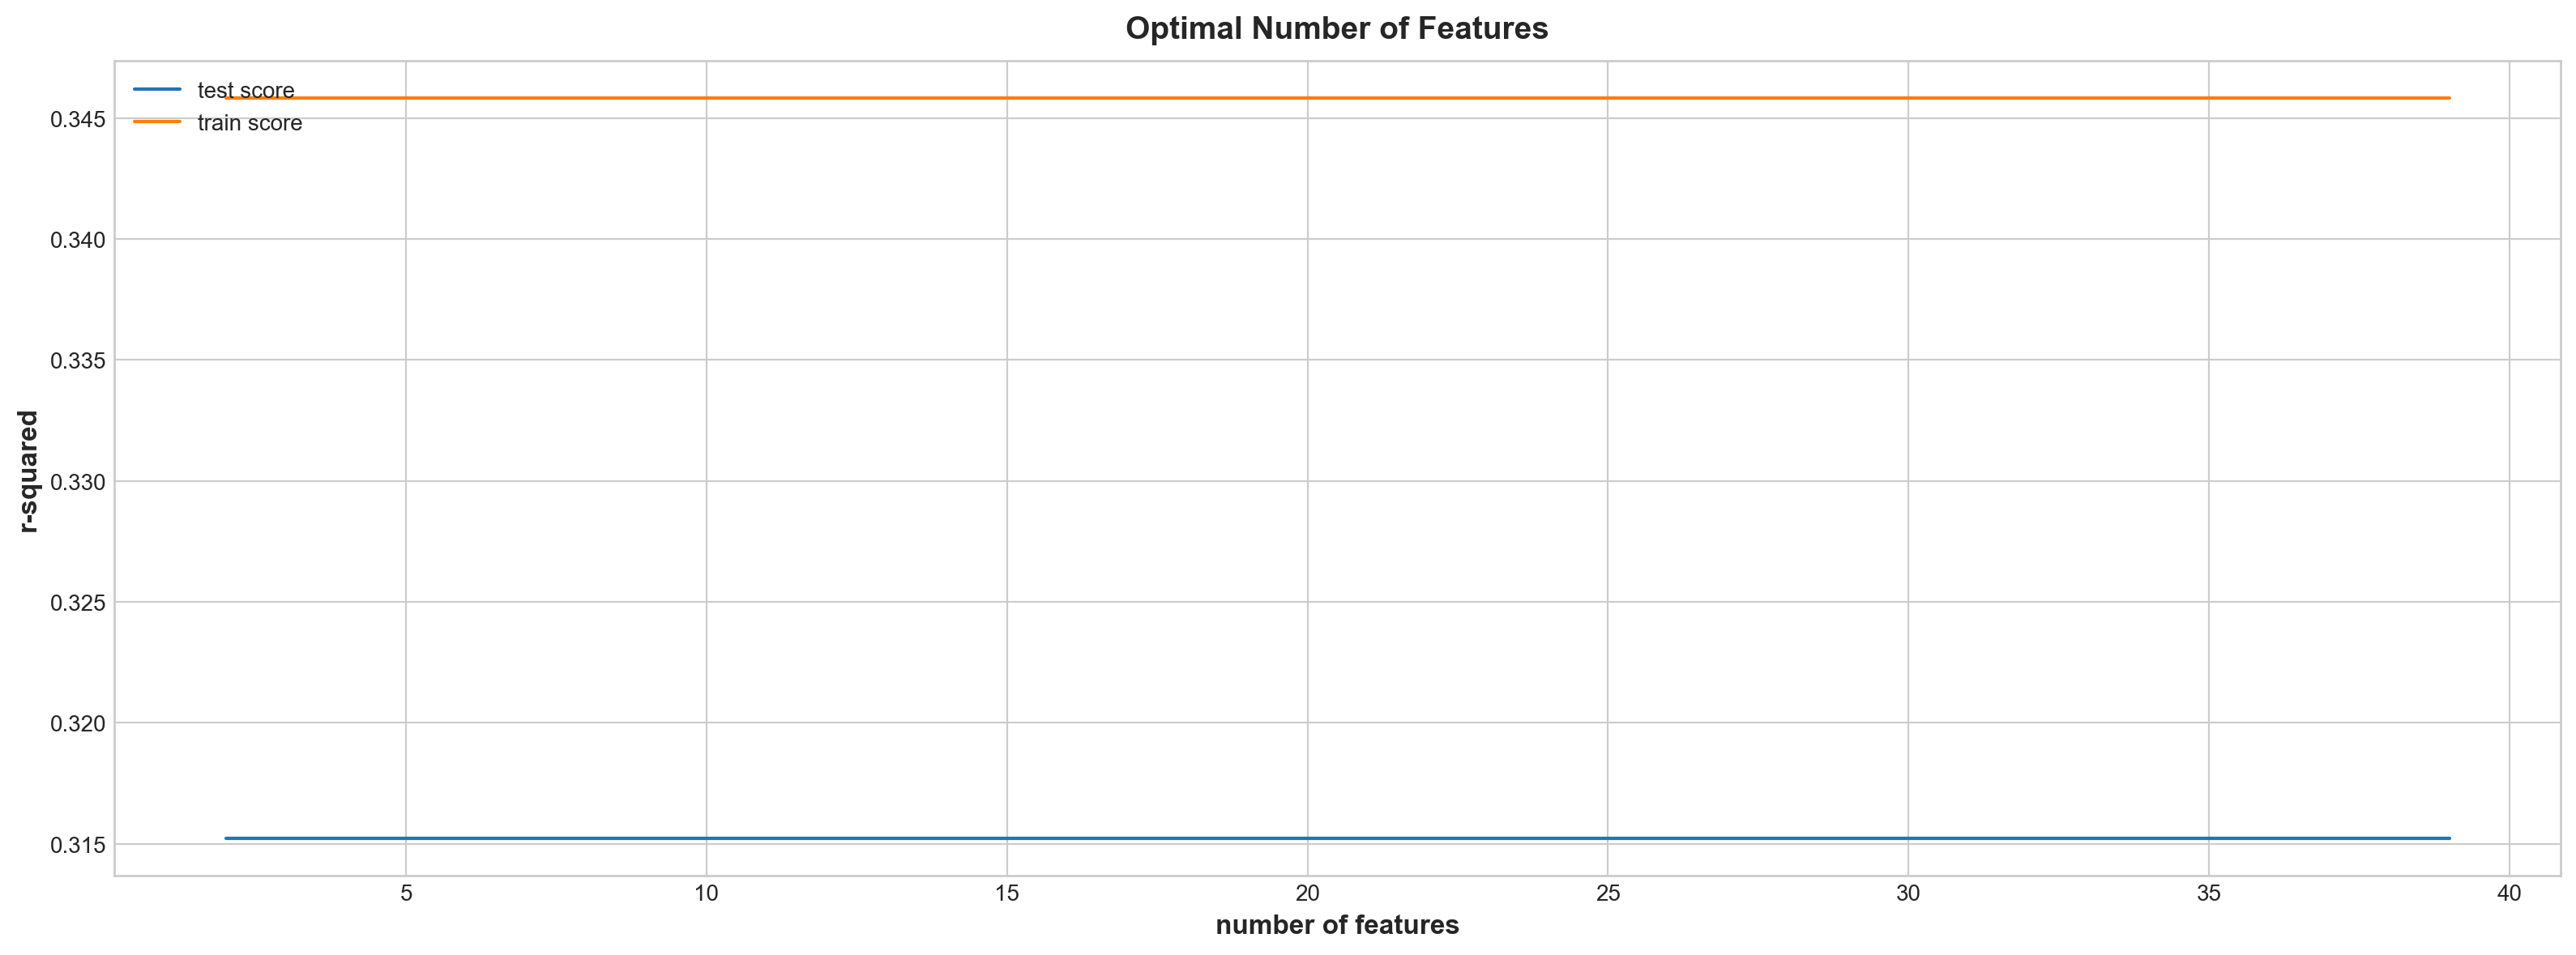

In [500]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## Sentiment Analysis

In [178]:
# Install vaderSentiment if you dont have the libraries yet
#!pip install vaderSentiment

# Load vaderSentimental library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


a positive sentiment, compound ≥ 0.05.
a negative sentiment, compound ≤ -0.05.
a neutral sentiment, the compound is between ]-0.05, 0.05[

The previous result shows that the sentence does not have any negative information (neg=0).
It has some neutral and positive tones (neu=0.585 and pos=0.415). 
However, the overall sentiment is positive, because compound > 0.05

In [179]:
df_Sentimental_Analysis = pd.read_json('reddit_comments.json')

# Create and initialise an object
sentiment = SentimentIntensityAnalyzer()

df_Sentimental_Analysis['compound'] = ''
df_Sentimental_Analysis['sentiment'] = ''

positive = 0
negative = 0
neutral = 0

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Sentimental_Analysis.iterrows():
    
    text = row["comment"]
    sent = sentiment.polarity_scores(text)
    #print("Sentiment of " + str(i) + ":", sent['compound'])
    df_Sentimental_Analysis.at[i,'compound'] = sent['compound']
    if float(sent['compound']) >= 0.05:
        df_Sentimental_Analysis.at[i,'sentiment'] = 'positive'
        positive += 1
    elif float(sent['compound']) <= -0.05:
        df_Sentimental_Analysis.at[i,'sentiment'] = 'negative'
        negative += 1
    else:
        df_Sentimental_Analysis.at[i,'sentiment'] = 'neutral'
        neutral += 1

In [180]:
print("Total positive feedbacks: " + str(positive))
print("Total negative feedbacks: " + str(negative))
print("Total neutral feedbacks: " + str(neutral))

Total positive feedbacks: 31
Total negative feedbacks: 21
Total neutral feedbacks: 18


In [181]:
#df_Sentimental_Analysis

pd.options.display.max_colwidth = 1000

df_Sentimental_Analysis.loc[df_Sentimental_Analysis['sentiment'] == 'positive']

,autor,comment,compound,sentiment
1,scrjim,Totally agree. We need projects to build 10k units+ in and around Dublin supported by the government. This waiting for developers to buy up sites in leafy suburbs so they can build expensive BTR schemes is bullshit.,0.0754,positive
3,Willing_Cause_7461,"BTR developments were actually cheaper than average. BTR was a victim of it's own success. Price of rentals was rising significantly faster than purchasable housing so BTR developments became popular. Some people seeing that began freaking out. You can still see it on this subreddit. Things like 'Do you expect people to live in a rental at 90??'. People apparently got it in their head that they would be forced to rent forever so, bye bye BTR.",0.3527,positive
8,unsureguy2015,"If you go back on site and select 'Only recent and frequently booked. Activity', you will see the number of entire airbnbs in Dublin is only 781 properties. If you let your apartment on Airbnb for a weekend 2 years ago and never let it since, it is one of those 3,786 properties on airbnb. However, it is not actually on airbnb for let now and should not be included in the stats.",0.0772,positive
9,bertnurney,Any idea how recent it means? If we could filter by recent but not necessarily frequent that would be an improvement,0.6124,positive
10,unsureguy2015,"It seems that if the property is let more than 90 days in a yet, it is 'Only recent and frequently booked Activity'. If we could filter by recent but not necessarily frequent that would be an improvement. Why is that an improvement? You need 'recent and frequently booked' to quantify the impact on the housing market. If I let my apartment on Airbnb this week and never let it again. Sure it was recently booked on airbnb, but you can't say it is constantly being booked and therefore taking a home off the market. This insideairbnb.com reasoning for that filter: Is the home, apartment or room rented frequently and displacing units of housing and residents? Does the income from Airbnb incentivise short-term rentals vs long-term housing?",0.9098,positive
11,bertnurney,OK you think that number is good to go on. I don't. Try airdna instead. They have a filter for properties that have been either available or listed one day over the past month. These are entire properties that would otherwise be on the long term rental market. The number is 2765 for Dublin: https://ibb.co/mRB5Vg6,0.7531,positive
12,hurpyderp,Have your factored in people who will rent their house out on Airbnb when they go on holidays or people who rent it out on Airbnb for a week or two and move to their parents house?,0.3818,positive
14,unsureguy2015,"OK you think that number is good to go on. I don't. Of course you don't. You are grasping at straws to back up a claim that you can't actually prove... The number is 2765 for Dublin: https://ibb.co/mRB5Vg6. Did you even read what you posted? Their number for entire properties is 1.5k... I had a look at airdna myself, as I have never been on it before. As you said they have the filter 'for properties that have been either available or listed one day over the past month'. The number of entire properties in Dublin with that filter is 768. Funnily that number pretty much matches insideairbnb... It is interesting that 68% of properties on airdna have AC. Simple question with a yes or no answer. Do irish homes usually have AC? The answer is no. So it seems a lot of airbnbs listed on airbnb might actually be purpose built short term lets that are allowed under the law. None of the above probably makes a different to you, as you just going to lie about the number of airbnb's in Dublin anyw...",0.9538,positive
15,bertnurney,"OK I misread the graph, but its still 1500 properties, where are you getting 768?",0.1069,positive
16,bertnurney,Where are you getting the 768 number from airdna? It's 1500,0.0772,positive
